# 企劃組資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

In [2]:
rich = pd.read_csv('rich_adj.csv',index_col='SERIAL_NUM')
normal = pd.read_csv('normal_adj.csv',index_col='SERIAL_NUM')
rich_large = pd.read_csv('rich_large_adj.csv',index_col='SERIAL_NUM')
rich_low = pd.read_csv('rich_low_adj.csv',index_col='SERIAL_NUM')
normal_large = pd.read_csv('normal_large_adj.csv',index_col='SERIAL_NUM')
normal_low = pd.read_csv('normal_low_adj.csv',index_col='SERIAL_NUM')
df = pd.read_csv('data_new.csv',index_col='SERIAL_NUM')

In [827]:
#rich = pd.read_csv('rich.csv',index_col='SERIAL_NUM')
#normal = pd.read_csv('normal.csv',index_col='SERIAL_NUM')
#rich_large = pd.read_csv('rich_large.csv',index_col='SERIAL_NUM')
#rich_low = pd.read_csv('rich_low.csv',index_col='SERIAL_NUM')
#normal_large = pd.read_csv('normal_large.csv',index_col='SERIAL_NUM')
#normal_low = pd.read_csv('normal_low.csv',index_col='SERIAL_NUM')
#data_new = pd.read_csv('data_new.csv',index_col='SERIAL_NUM')

## 各dataset 平均資產金額

In [166]:
col = ['normal', 'normal_large', 'normal_low', 'rich', 'rich_large', 'rich_low']
for k,j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    print(col[k], ' average AUM = ', j[~j.loc[:,"AUM_M1":"AUM_M13"].eq(0).all(1)].loc[:,"AUM_M1":"AUM_M13"].mean().mean())

normal  average AUM =  274821.215920682
normal_large  average AUM =  272353.67205519543
normal_low  average AUM =  291484.758152517
rich  average AUM =  782144.5246113618
rich_large  average AUM =  780899.1155529873
rich_low  average AUM =  879787.7610821383


normal  average AUM =  136829.63758793485
normal_large  average AUM =  137545.3146601955
normal_low  average AUM =  131649.44805001488
rich  average AUM =  1257872.7151067068
rich_large  average AUM =  1249729.5974999138
rich_low  average AUM =  1330835.7543316833


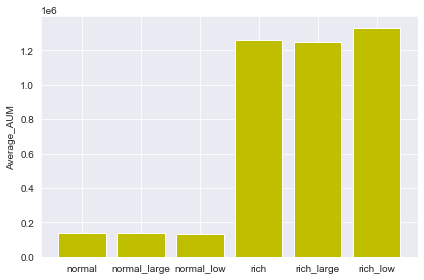

In [840]:
col = ['normal', 'normal_large', 'normal_low', 'rich', 'rich_large', 'rich_low']
x = col
y = []
for k,j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    y.append(j[~j.loc[:,"AUM_M1":"AUM_M13"].eq(0).all(1)].loc[:,"AUM_M1":"AUM_M13"].mean().median())
    print(col[k], ' average AUM = ', j[~j.loc[:,"AUM_M1":"AUM_M13"].eq(0).all(1)].loc[:,"AUM_M1":"AUM_M13"].mean().median())
plt.bar(x,y,color = 'y')
plt.ylabel('Average_AUM')
plt.tight_layout()

## 年齡與資產關係

In [974]:
df.shape

(200092, 330)

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


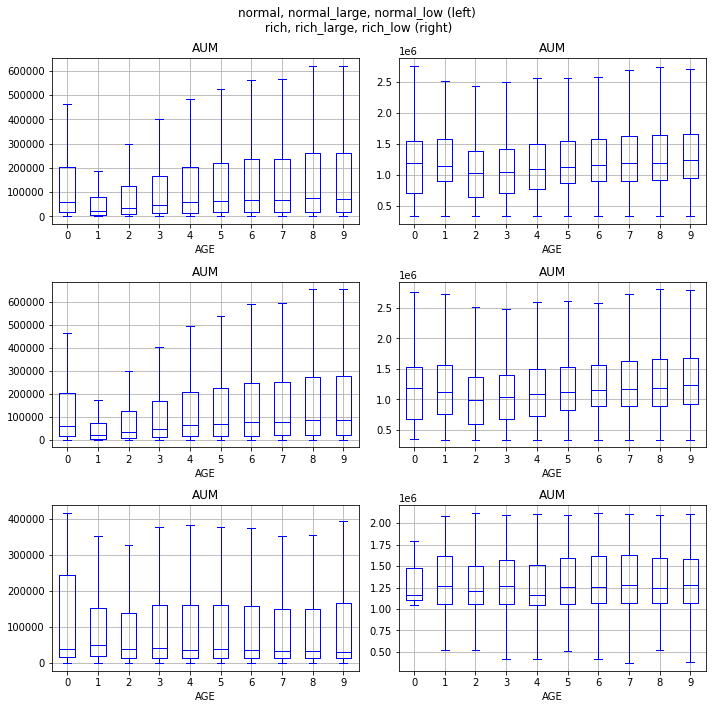

In [113]:
# 每個 dataset 的AUM1~13不等於0，依照年齡的分配



position = order([3,2])
fig, axes = plt.subplots(3, 2,figsize=(10, 10))
for k, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    
    tem  = j[~j.loc[:,f"AUM_M1":f"AUM_M13"].eq(0).all(1)]
    tem['mean'] = tem.loc[:,f"AUM_M1":f"AUM_M13"].mean(axis=1)
    tem.boxplot(column = 'mean', by= 'AGE',figsize=(10,10), showfliers=False,color ='b',ax= axes[position[k]])
    axes[position[k]].set_title(f'AUM')
    plt.tight_layout()       
    
    
fig.suptitle('normal, normal_large, normal_low (left)\n rich, rich_large, rich_low (right)')
plt.tight_layout()   
#plt.savefig("AUM.png")
plt.show()

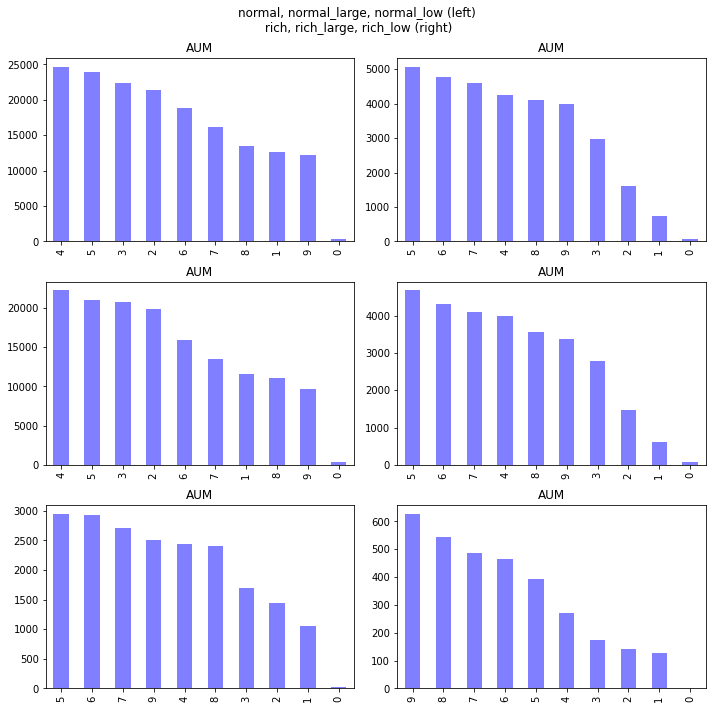

In [114]:
# 每個 dataset 的AUM1~13不等於0，各年齡人數


position = order([3,2])
fig, axes = plt.subplots(3, 2,figsize=(10, 10))
for k, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    j[~j.loc[:,f"AUM_M1":f"AUM_M13"].eq(0).all(1)]['AGE'].value_counts().plot.bar(ax= axes[position[k]], color='b', alpha = 0.5)
    axes[position[k]].set_title(f'AUM')
    plt.tight_layout()       
    
    
fig.suptitle('normal, normal_large, normal_low (left)\n rich, rich_large, rich_low (right)')
plt.tight_layout()   
#plt.savefig("AUM.png")
plt.show()

### Normal

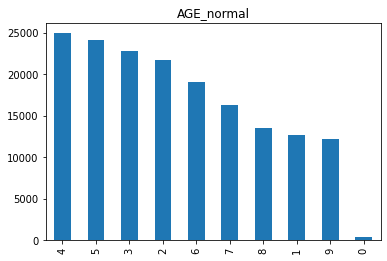

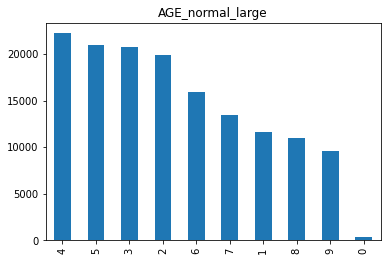

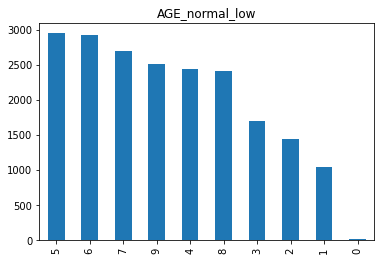

In [115]:
# normal 每個 dataset 年齡人數

ax = normal['AGE'].value_counts().plot.bar()
ax.set_title('AGE_normal')
plt.show()

ax = normal_large['AGE'].value_counts().plot.bar()
ax.set_title('AGE_normal_large')
plt.show()

ax = normal_low['AGE'].value_counts().plot.bar()
ax.set_title('AGE_normal_low')
plt.show()



In [112]:
def order(x):
    list = []
    for j in range(x[1]):
        for i in range(x[0]):
            list.append((i,j))
    return list

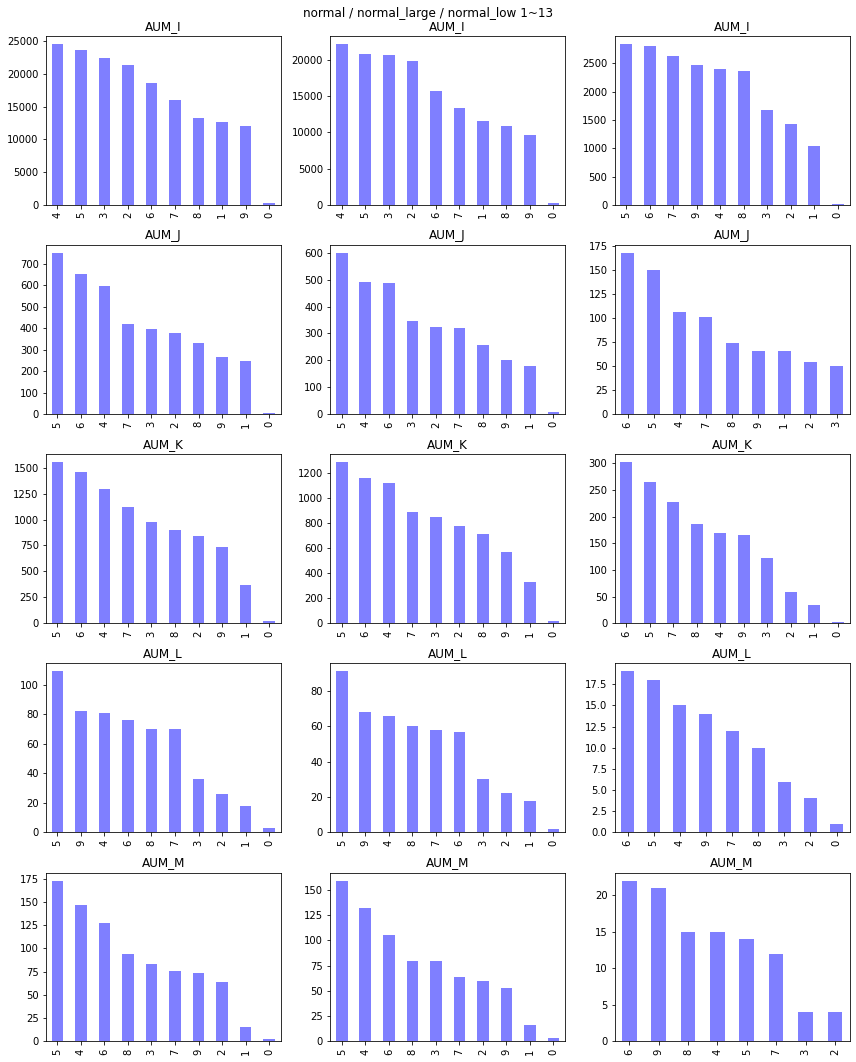

In [116]:
# normal 的每個 dataset 持有個資產的年齡人數

position = order([5,3])
fig, axes = plt.subplots(5, 3,figsize=(12, 15))
c = 0
for j in [normal, normal_large, normal_low]:
    for k, i in enumerate(['I','J','K','L','M']):
        j[~j.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]['AGE'].value_counts().plot.bar(ax= axes[position[k+5*c]], color='b', alpha = 0.5)
        axes[position[k+5*c]].set_title(f'AUM_{i}')
        plt.tight_layout()       
    c +=1
    
fig.suptitle('normal / normal_large / normal_low 1~13')
plt.tight_layout()   
#plt.savefig("normal_asset.png")
plt.show()


C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

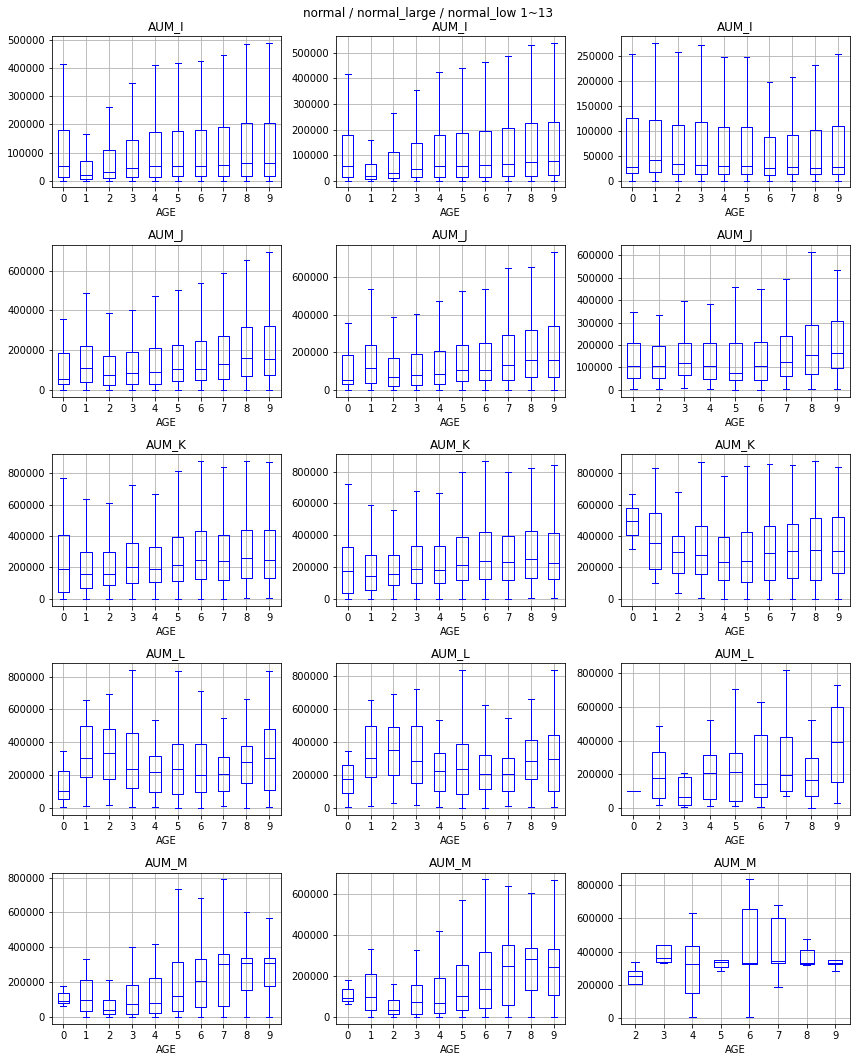

In [117]:
# normal 的每個 dataset 年齡別的個資產分布

position = order([5,3])
#sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 3,figsize=(12, 15))
c = 0
for j in [normal, normal_large, normal_low]:
    for k, i in enumerate(['I','J','K','L','M']):
        
        tem = j[~j.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]
        tem['mean'] = tem.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].mean(axis=1)
        tem.boxplot(column = 'mean', by= 'AGE',figsize=(10,8), showfliers=False,color ='b',ax= axes[position[k+5*c]])
        axes[position[k+5*c]].set_title(f'AUM_{i}')
        plt.tight_layout()
    c +=1
    
fig.suptitle('normal / normal_large / normal_low 1~13')
plt.tight_layout()   
#plt.savefig("normal_asset_amount.png")
plt.show()

### Rich 

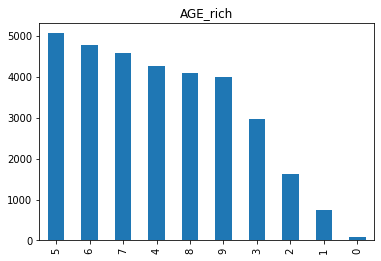

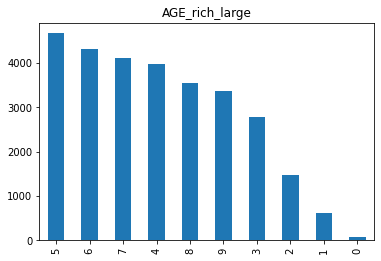

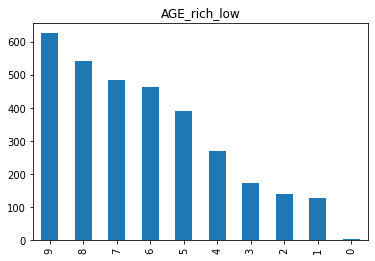

In [118]:
# rich 每個 dataset 年齡人數
ax = rich['AGE'].value_counts().plot.bar()
ax.set_title('AGE_rich')
plt.show()

ax = rich_large['AGE'].value_counts().plot.bar()
ax.set_title('AGE_rich_large')
plt.show()

ax = rich_low['AGE'].value_counts().plot.bar()
ax.set_title('AGE_rich_low')
plt.show()

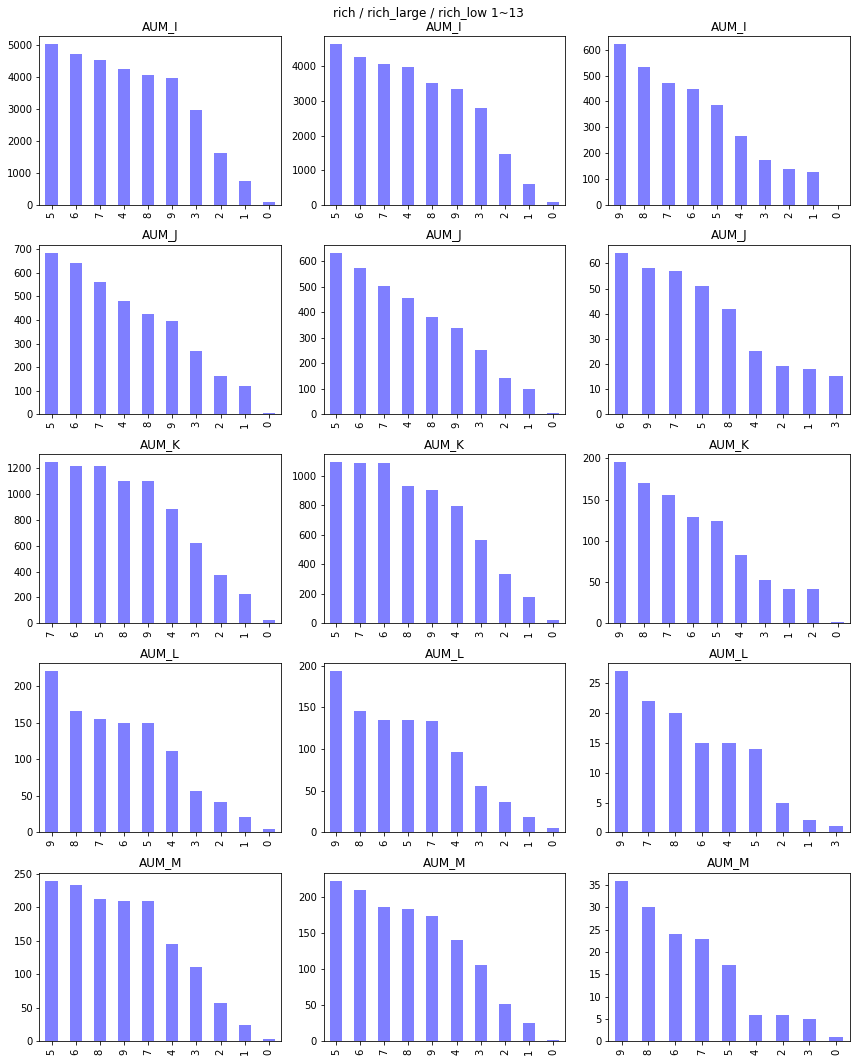

In [119]:
# rich 的每個 dataset 持有個資產的年齡分布

position = order([5,3])
fig, axes = plt.subplots(5, 3,figsize=(12, 15))
c = 0
for j in [rich, rich_large, rich_low]:
    for k, i in enumerate(['I','J','K','L','M']):
        j[~j.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]['AGE'].value_counts().plot.bar(ax= axes[position[k+5*c]], color='b', alpha = 0.5)
        axes[position[k+5*c]].set_title(f'AUM_{i}')
        plt.tight_layout()
    c +=1
    
fig.suptitle('rich / rich_large / rich_low 1~13')
plt.tight_layout()   
#plt.savefig("rich_asset.png")
plt.show()

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

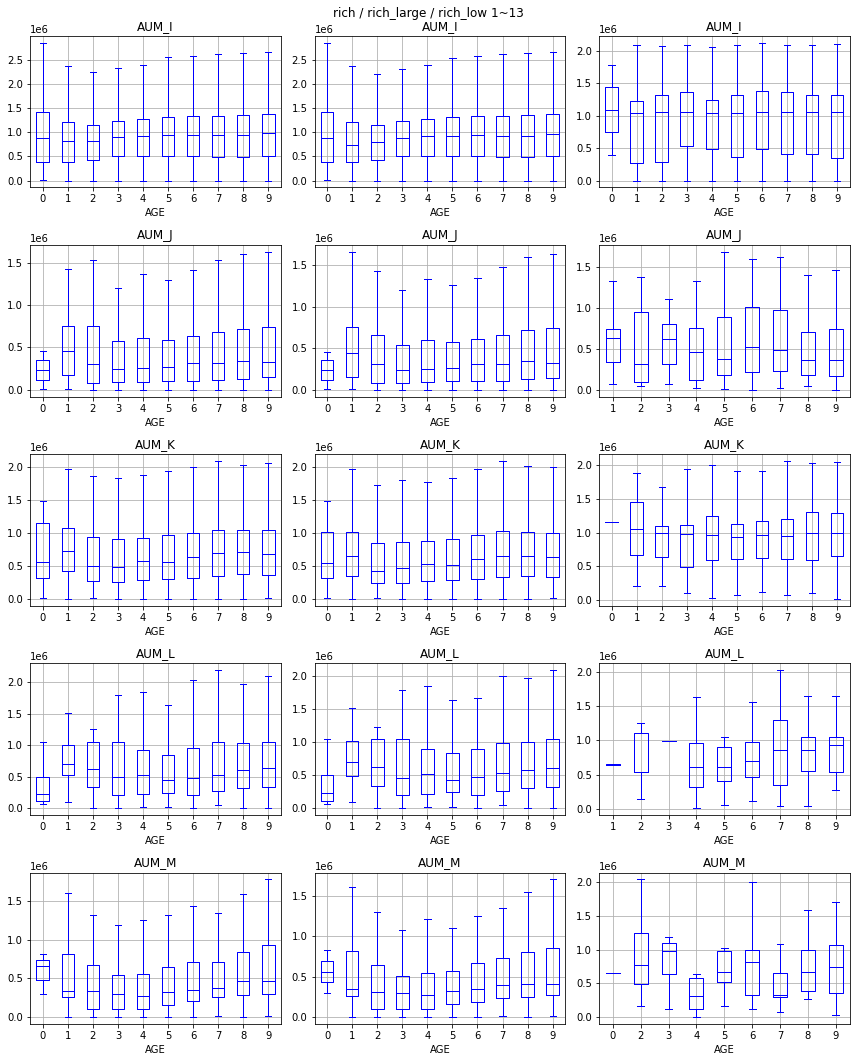

In [120]:
# rich 的每個 dataset 年齡別的個資產分布

position = order([5,3])
#sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 3,figsize=(12, 15))
c = 0
for j in [rich, rich_large, rich_low]:
    for k, i in enumerate(['I','J','K','L','M']):
        
        tem = j[~j.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].eq(0).all(1)]
        tem['mean'] = tem.loc[:,f"AUM_{i}_M1":f"AUM_{i}_M13"].mean(axis=1)
        tem.boxplot(column = 'mean', by= 'AGE',figsize=(10,8), showfliers=False,color ='b',ax= axes[position[k+5*c]])
        axes[position[k+5*c]].set_title(f'AUM_{i}')
        plt.tight_layout()
    c +=1
    
fig.suptitle('rich / rich_large / rich_low 1~13')
plt.tight_layout()   
#plt.savefig("rich_asset_amount.png")
plt.show()

## 換匯次數與AGE關係

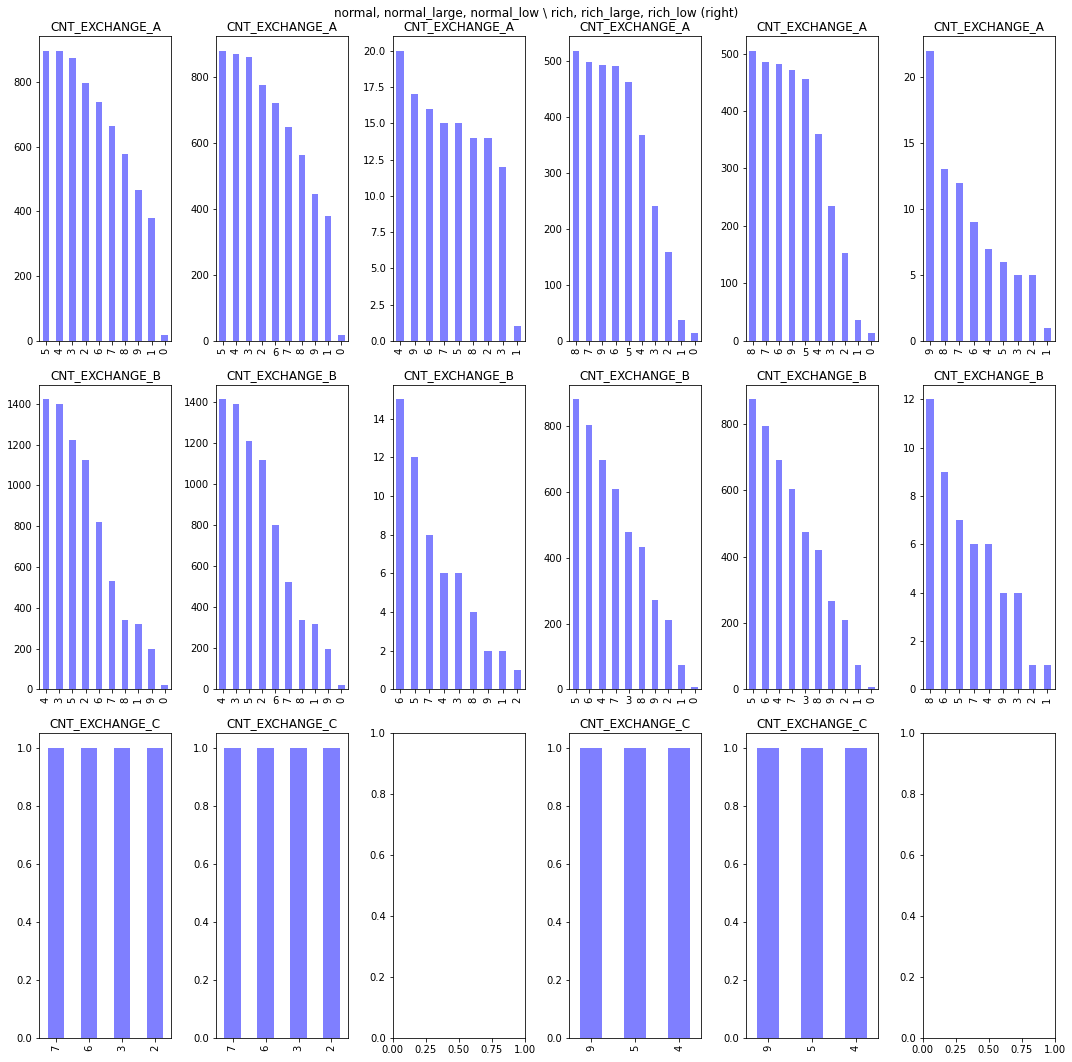

In [121]:
position = order([3,6])
fig, axes = plt.subplots(3, 6,figsize=(15, 15))

for l, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k, i in enumerate(['A','B','C']):
        tem = j[~j.loc[:,f"CNT_EXCHANGE_{i}_M1":f'CNT_EXCHANGE_{i}_M13'].eq(0).all(1)]
        
        if tem.empty:
            continue
        
        else:
            tem['AGE'].value_counts().plot.bar(ax= axes[(k,l)], color='b', alpha = 0.5)
            axes[(k,l)].set_title(f'CNT_EXCHANGE_{i}')
            plt.tight_layout()       
    
    
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low (right)')
plt.tight_layout()   
#plt.savefig("exchange_times.png")
plt.show()


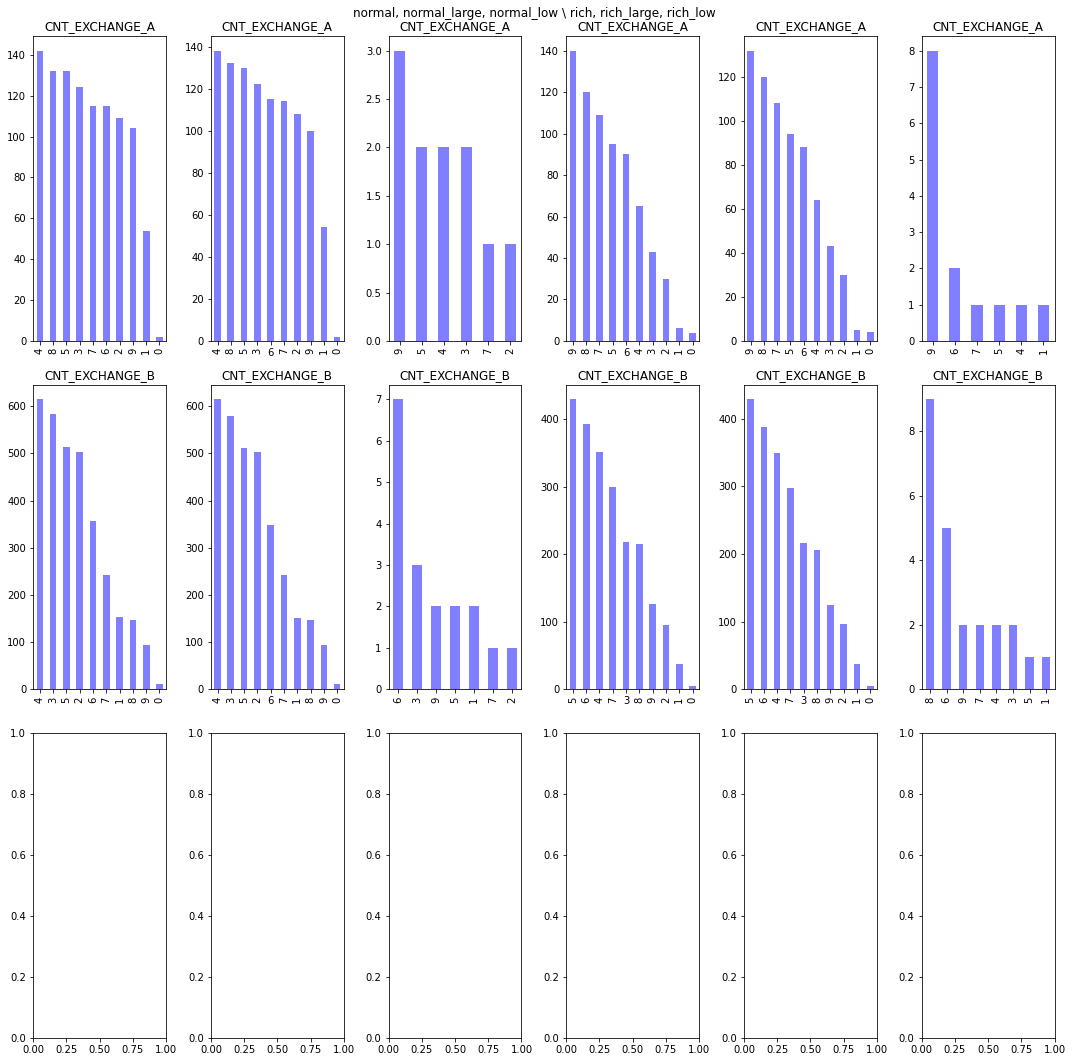

In [122]:


position = order([3,6])
fig, axes = plt.subplots(3, 6,figsize=(15, 15))

for l, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k, i in enumerate(['A','B','C']):
        tem = j[~j.loc[:,f"CNT_EXCHANGE_{i}_M11":f'CNT_EXCHANGE_{i}_M13'].eq(0).all(1)]
        
        if tem.empty:
            continue
        
        else:
            tem['AGE'].value_counts().plot.bar(ax= axes[(k,l)], color='b', alpha = 0.5)
            axes[(k,l)].set_title(f'CNT_EXCHANGE_{i}')
            plt.tight_layout()       
    
    
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low ')
plt.tight_layout()   
#plt.savefig("exchange_times.png")
plt.show()


## 各通路每月換匯次數變化(以人數計算)

In [123]:
rich[rich['AMT_EXCHANGE_A_M12']!=0].equals(rich[rich['CNT_EXCHANGE_A_M12']!=0])

True

In [124]:
(rich['AMT_EXCHANGE_A_M12']!=0).sum()

238

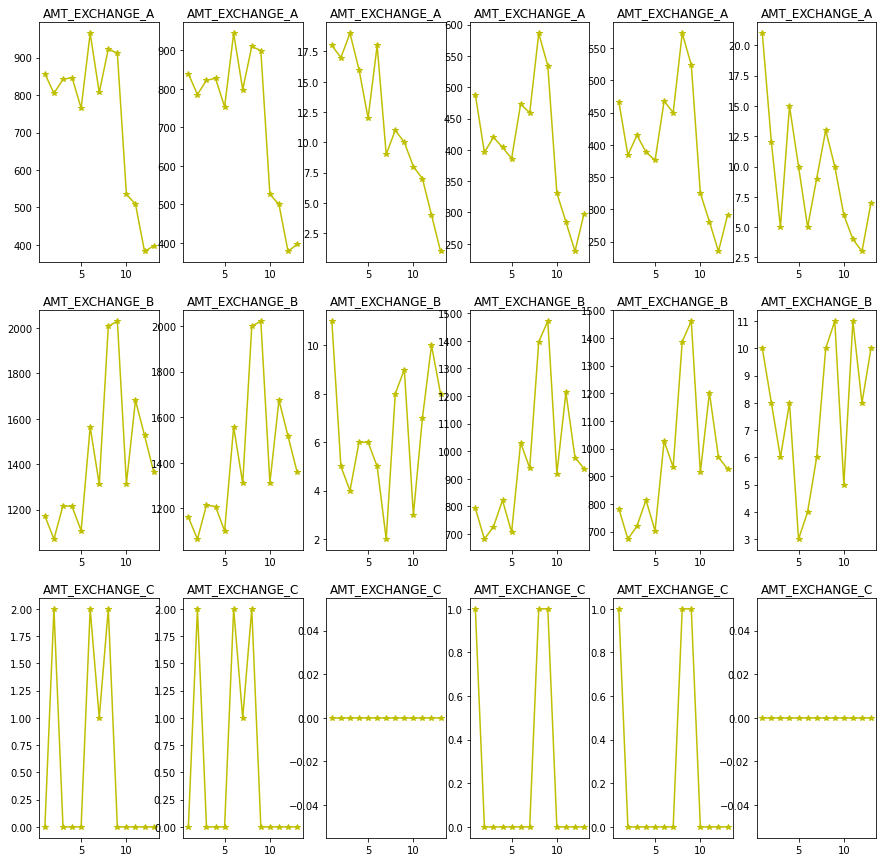

In [125]:

fig, axes = plt.subplots(3, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate(['A','B','C']):
        data = []
        for j in range(1,14):
            data.append((d[f'AMT_EXCHANGE_{i}_M{j}'] != 0).sum())        
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'y')
        axes[(k,l)].set_title(f'AMT_EXCHANGE_{i}')
#plt.savefig("exchange_trend.png")

## 各通路每月換匯金額變化

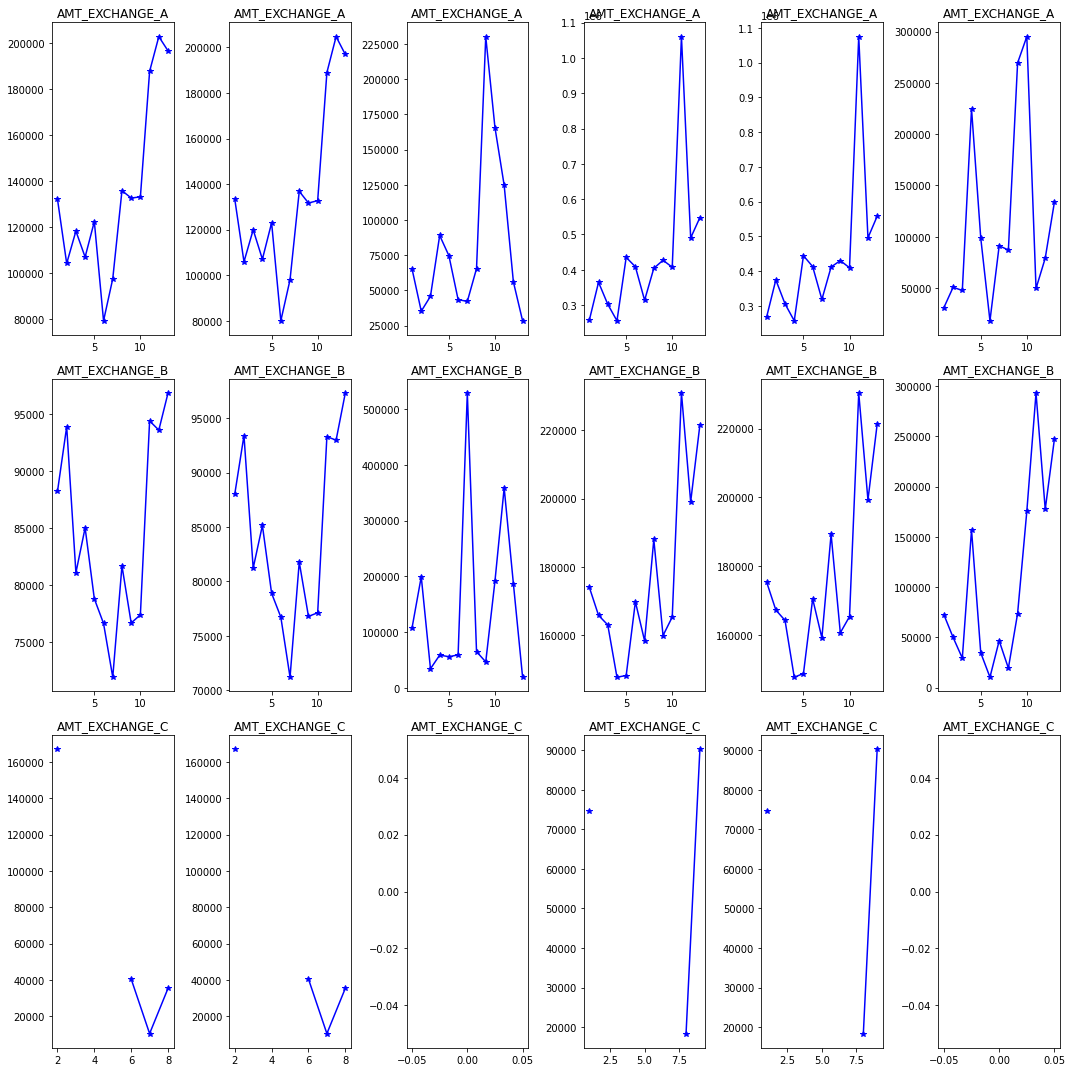

In [126]:

fig, axes = plt.subplots(3, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate(['A','B','C']):
        data = []
        for j in range(1,14):
            data.append(d[d[f'AMT_EXCHANGE_{i}_M{j}']!=0][f'AMT_EXCHANGE_{i}_M{j}'].mean())        
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'b')
        axes[(k,l)].set_title(f'AMT_EXCHANGE_{i}')
plt.tight_layout()
#plt.savefig("exchange_trend.png")

In [127]:
normal[normal['AMT_EXCHANGE_A_M11']>2*10**6]['AMT_EXCHANGE_A_M11'].index

Int64Index([98412, 107937, 157603, 168716, 200063], dtype='int64', name='SERIAL_NUM')

<AxesSubplot:xlabel='SERIAL_NUM'>

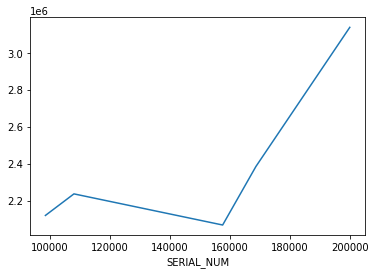

In [128]:
normal[normal['AMT_EXCHANGE_A_M11']>2*10**6]['AMT_EXCHANGE_A_M11'].plot()

In [189]:
normal.loc[[3031, 13428, 64782, 92309, 98412, 107937, 110118, 152455, 157603, 168716],:].loc[:,'AUM_M1':'AUM_M13'].mean(axis=1)

SERIAL_NUM
3031      1.843251e+06
13428     2.117068e+06
64782     1.906180e+06
92309     1.454170e+06
98412     1.329712e+05
107937    7.838664e+05
110118    1.111338e+06
152455    2.058252e+06
157603    4.795612e+05
168716    7.663514e+05
dtype: float64

## 年齡和貸款關係

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

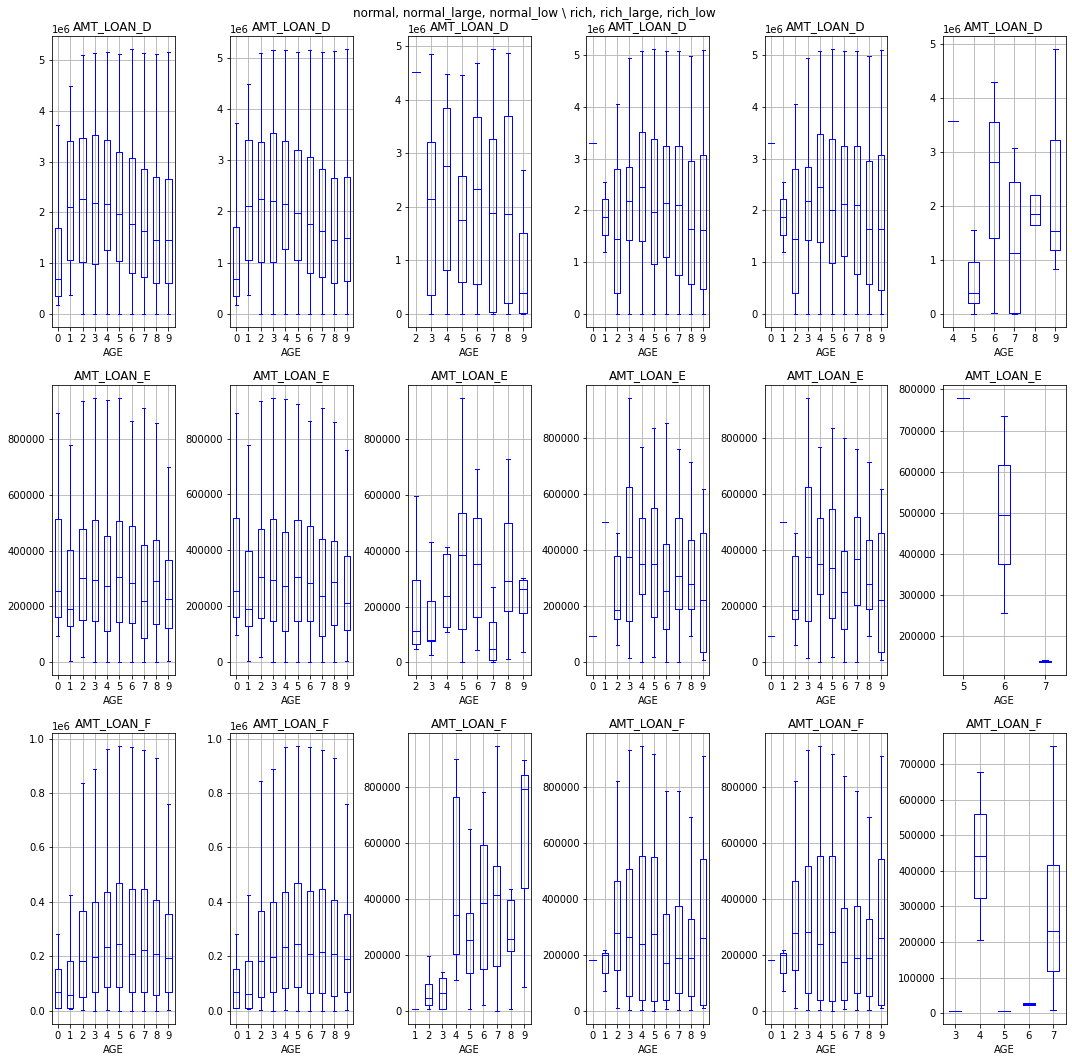

In [129]:

#sns.set_style('darkgrid')
fig, axes = plt.subplots(3, 6,figsize=(15, 15))

for l, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k, i in enumerate(['D','E','F']):
        tem = j[~j.loc[:,f"AMT_LOAN_{i}_M1":f'AMT_LOAN_{i}_M13'].eq(0).all(1)]
        
        if tem.empty:
            continue
        else:
            tem['mean'] = tem.loc[:,f"AMT_LOAN_{i}_M1":f"AMT_LOAN_{i}_M13"].mean(axis=1)
            tem.boxplot(column = 'mean', by= 'AGE',figsize=(10,8), showfliers=False,color ='b',ax= axes[(k,l)])
            axes[(k,l)].set_title(f'AMT_LOAN_{i}')
            plt.tight_layout()

    
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low ')
plt.tight_layout()   
#plt.savefig("asset_loan.png")
plt.show()

### 各dataset貸款分配

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

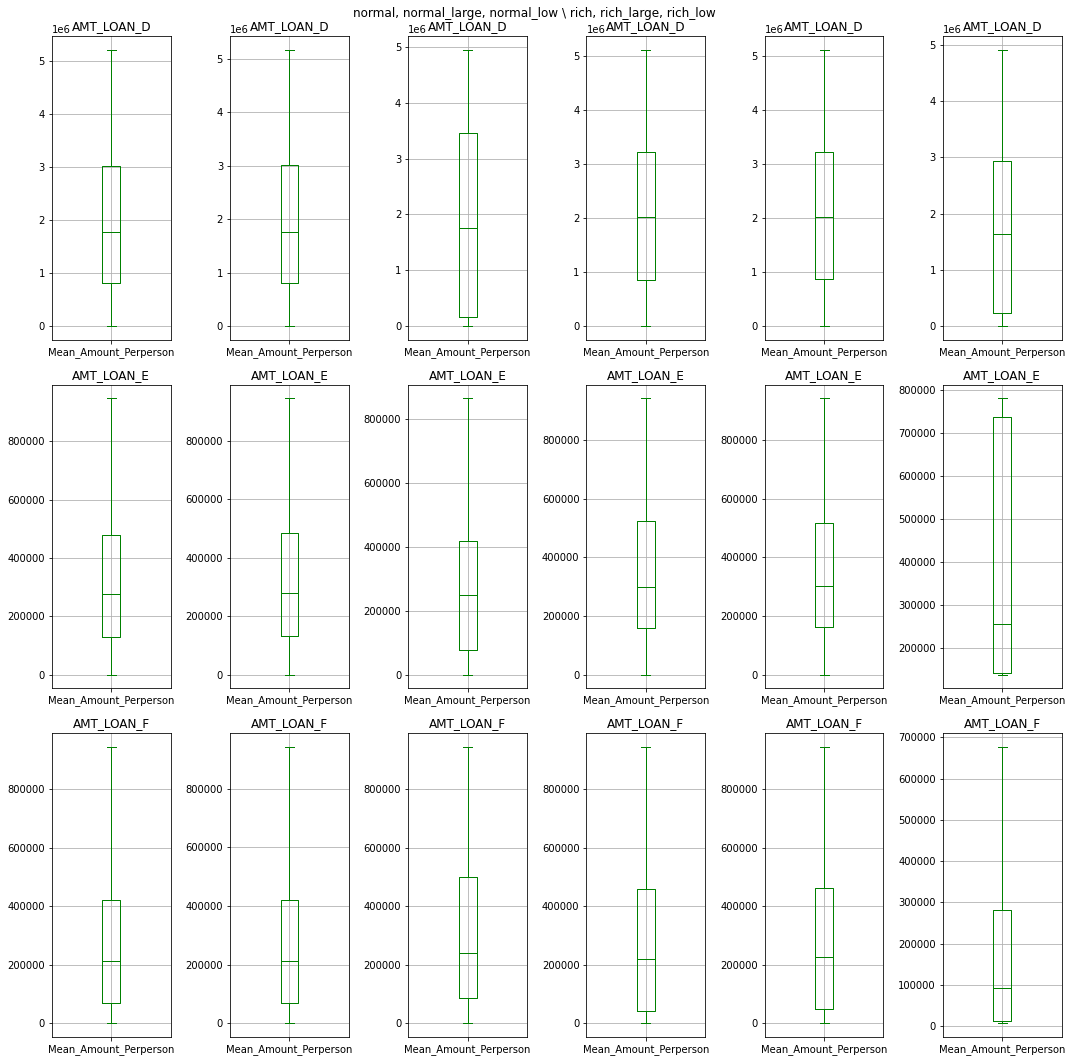

In [130]:


fig, axes = plt.subplots(3, 6,figsize=(15, 15))

for l, j in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k, i in enumerate(['D','E','F']):
        tem = j[~j.loc[:,f"AMT_LOAN_{i}_M1":f'AMT_LOAN_{i}_M13'].eq(0).all(1)]
        
        if tem.empty:
            continue
        else:
            tem['Mean_Amount_Perperson'] = tem.loc[:,f"AMT_LOAN_{i}_M1":f"AMT_LOAN_{i}_M13"].mean(axis=1)
            tem[['Mean_Amount_Perperson']].boxplot(showfliers=False,figsize=(10,8),color ='green',ax= axes[(k,l)])
            axes[(k,l)].set_title(f'AMT_LOAN_{i}')
            plt.tight_layout()

    
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low ')
plt.tight_layout()   
#plt.savefig("loan.png")
plt.show()

### 貸款趨勢

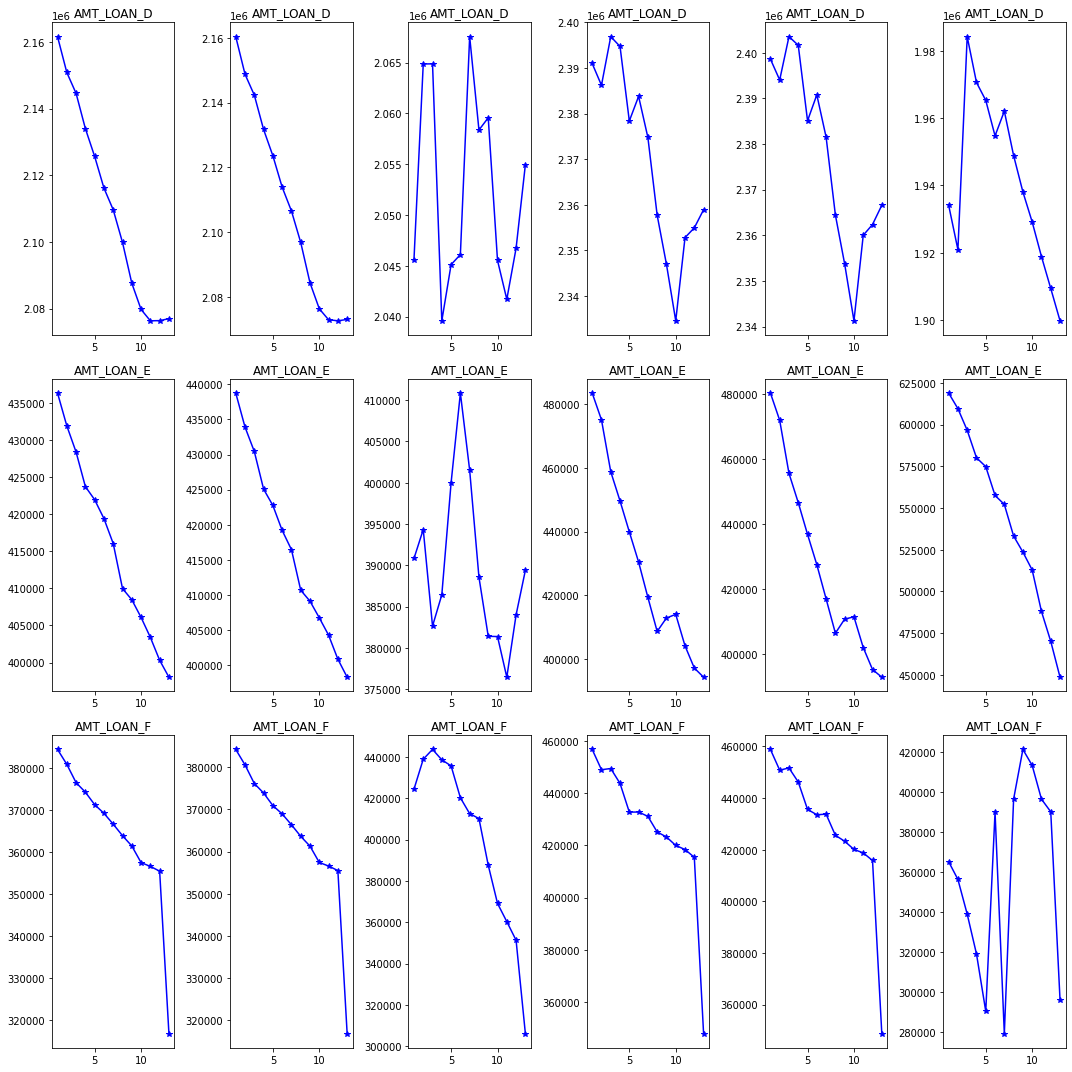

In [131]:

fig, axes = plt.subplots(3, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate(['D','E','F']):
        data = []
        for j in range(1,14):
            data.append(d[d[f'AMT_LOAN_{i}_M{j}']!=0][f'AMT_LOAN_{i}_M{j}'].mean())        
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'b')
        axes[(k,l)].set_title(f'AMT_LOAN_{i}')
plt.tight_layout()
#plt.savefig("loan_trend.png")

In [132]:
tem = normal
tem = tem[~tem.loc[:,f"AUM_I_M1":f'AUM_M_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,f"AUM_J_M1":f'AUM_M_M13'].eq(0).all(1)]


J = tem.loc[:,"AUM_J_M1":"AUM_J_M13"].diff(axis=1).drop('AUM_J_M1',axis=1)
J.columns = [np.arange(2,14)]
J

,2,3,4,5,6,7,8,9,10,11,12,13
SERIAL_NUM,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,927.0,0.0,4275.0,2699.0,6200.0,664.0,0.0,0.0,3993.0,9199.0,440.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,-11148.0,-385845.0,8753.0,15708.0,15329.0,15918.0,15955.0,16136.0
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
198013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [424]:
I

,2,3,4,5,6,7,8,9,10,11,12,13
SERIAL_NUM,,,,,,,,,,,,
5,1.000000,1.000000,-339.243137,0.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN
12,1.000000,1.000000,1.000000,1.000000,1.000000,0.658613,-19.967078,1.000000,NaN,NaN,1.000000,1.000000
54,-88.434783,-44.503448,1.484711,1.356545,0.802733,0.804642,-3.051386,15.754725,2.305613,-5.709854,-33.940257,167.403636
55,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999564,0.417630,0.968814,1.000000,1.000000
56,1.000000,1.000000,1.000000,114.474168,-2.995473,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
181311,1.000000,1.000000,1.000000,0.528762,-100.497863,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
181334,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
181339,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 個資產貢獻度

In [133]:
col = ['whole dataset','normal', 'normal_large','normal_low','rich', 'rich_large', 'rich_low']
col2 = ['I','J','K','L','M']
for k,i in enumerate([df, normal, normal_large, normal_low, rich, rich_large, rich_low]):
    tem = i
    tem = tem[~tem.loc[:,f"AUM_I_M1":f'AUM_M_M13'].eq(0).all(1)]
    tem = tem[~tem.loc[:,f"AUM_J_M1":f'AUM_M_M13'].eq(0).all(1)]
    
    I = tem.loc[:,"AUM_I_M1":"AUM_I_M13"].diff(axis=1).drop('AUM_I_M1',axis=1)
    I.columns = [np.arange(2,14)]
    
    J = tem.loc[:,"AUM_J_M1":"AUM_J_M13"].diff(axis=1).drop('AUM_J_M1',axis=1)
    J.columns = [np.arange(2,14)]
    
    K = tem.loc[:,"AUM_K_M1":"AUM_K_M13"].diff(axis=1).drop('AUM_K_M1',axis=1)
    K.columns = [np.arange(2,14)]
    
    L = tem.loc[:,"AUM_L_M1":"AUM_L_M13"].diff(axis=1).drop('AUM_L_M1',axis=1)
    L.columns = [np.arange(2,14)]
    
    M = tem.loc[:,"AUM_M_M1":"AUM_M_M13"].diff(axis=1).drop('AUM_M_M1',axis=1)
    M.columns = [np.arange(2,14)]
    
    AUM =  tem.loc[:,"AUM_M1":"AUM_M13"].diff(axis=1).drop('AUM_M1',axis=1)
    AUM.columns = [np.arange(2,14)]
    I = (I / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
    J = (J / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
    K = (K / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
    L = (L / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
    M = (M / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)

    
 

    #for d in  [I,J,K,L,M]:
    #    d.plot(figsize=(5,5),title = '')
    #    plt.show()

    
    tem = pd.concat([I.mean(),J.mean(),K.mean(),L.mean(),M.mean()],axis=1)
    tem.columns = ['I','J','K','L','M']
    tem['Con']  =tem.abs().idxmax(axis=1)
    

    print(tem)
    print('============================================================')
    print('============================================================')

            I          J         K          L         M Con
2    0.499903   0.078407  0.288696   0.062843  0.070151   I
3    1.058535   0.428962 -0.428551  -0.008153 -0.050793   I
4  -40.895106  -3.397453 -0.464298  45.349569  0.407287   L
5  -69.636841  70.505170  0.167939  -0.052446  0.016179   J
6    6.249315  -5.524162  0.329059   0.016170 -0.070383   I
7   -0.311405   0.583078  0.698576   0.026644  0.003106   K
8    0.794561  -0.162169  0.238589   0.010138  0.118880   I
9    0.830027  -0.078147  0.091550   0.006565  0.150004   I
10   1.617567  -0.493798 -0.224059   0.063017  0.037273   I
11   0.733661   0.173725  0.250669   0.042360 -0.200415   I
12  12.667152 -11.320199 -0.338419  -0.006349 -0.002185   I
13   2.656226  -2.095457  0.564080  -0.012046 -0.112803   I
           I         J         K         L         M Con
2   1.406433 -0.840620  0.363191  0.021126  0.049870   I
3   1.288147  0.438014 -0.614136  0.006006 -0.118032   I
4   4.849181 -4.741373  0.766630  0.011513  0.114

### 證券戶標籤

In [58]:
tem = df

In [5]:
normal.shape

(167901, 331)

In [6]:
rich.shape

(32191, 331)

In [11]:
tem = normal
tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)].shape
#tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']

(28008, 331)

In [15]:
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem.shape
#tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']

(780, 330)

In [17]:
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem[tem.loc[:,'YN_SEC_ACC_M13':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem.shape

(52, 330)

AUM_I_M1 0
AUM_I_M2 0
AUM_I_M3 0
AUM_I_M4 0
AUM_I_M5 0
AUM_I_M6 0
AUM_I_M7 0
AUM_I_M8 0
AUM_I_M9 0
AUM_I_M10 0
AUM_I_M11 0
AUM_I_M12 0
AUM_I_M13 0
AUM_J_M1 36
AUM_J_M2 36
AUM_J_M3 36
AUM_J_M4 36
AUM_J_M5 36
AUM_J_M6 36
AUM_J_M7 36
AUM_J_M8 36
AUM_J_M9 36
AUM_J_M10 36
AUM_J_M11 36
AUM_J_M12 36
AUM_J_M13 35
AUM_K_M1 36
AUM_K_M2 36
AUM_K_M3 36
AUM_K_M4 36
AUM_K_M5 36
AUM_K_M6 36
AUM_K_M7 36
AUM_K_M8 36
AUM_K_M9 36
AUM_K_M10 36
AUM_K_M11 36
AUM_K_M12 36
AUM_K_M13 36
AUM_L_M1 40
AUM_L_M2 40
AUM_L_M3 40
AUM_L_M4 40
AUM_L_M5 40
AUM_L_M6 40
AUM_L_M7 40
AUM_L_M8 40
AUM_L_M9 40
AUM_L_M10 40
AUM_L_M11 40
AUM_L_M12 40
AUM_L_M13 40
AUM_M_M1 37
AUM_M_M2 37
AUM_M_M3 37
AUM_M_M4 37
AUM_M_M5 37
AUM_M_M6 37
AUM_M_M7 37
AUM_M_M8 37
AUM_M_M9 37
AUM_M_M10 37
AUM_M_M11 37
AUM_M_M12 37
AUM_M_M13 37
AUM_M1 0
AUM_M2 0
AUM_M3 0
AUM_M4 0
AUM_M5 0
AUM_M6 0
AUM_M7 0
AUM_M8 0
AUM_M9 0
AUM_M10 0
AUM_M11 0
AUM_M12 0
AUM_M13 0


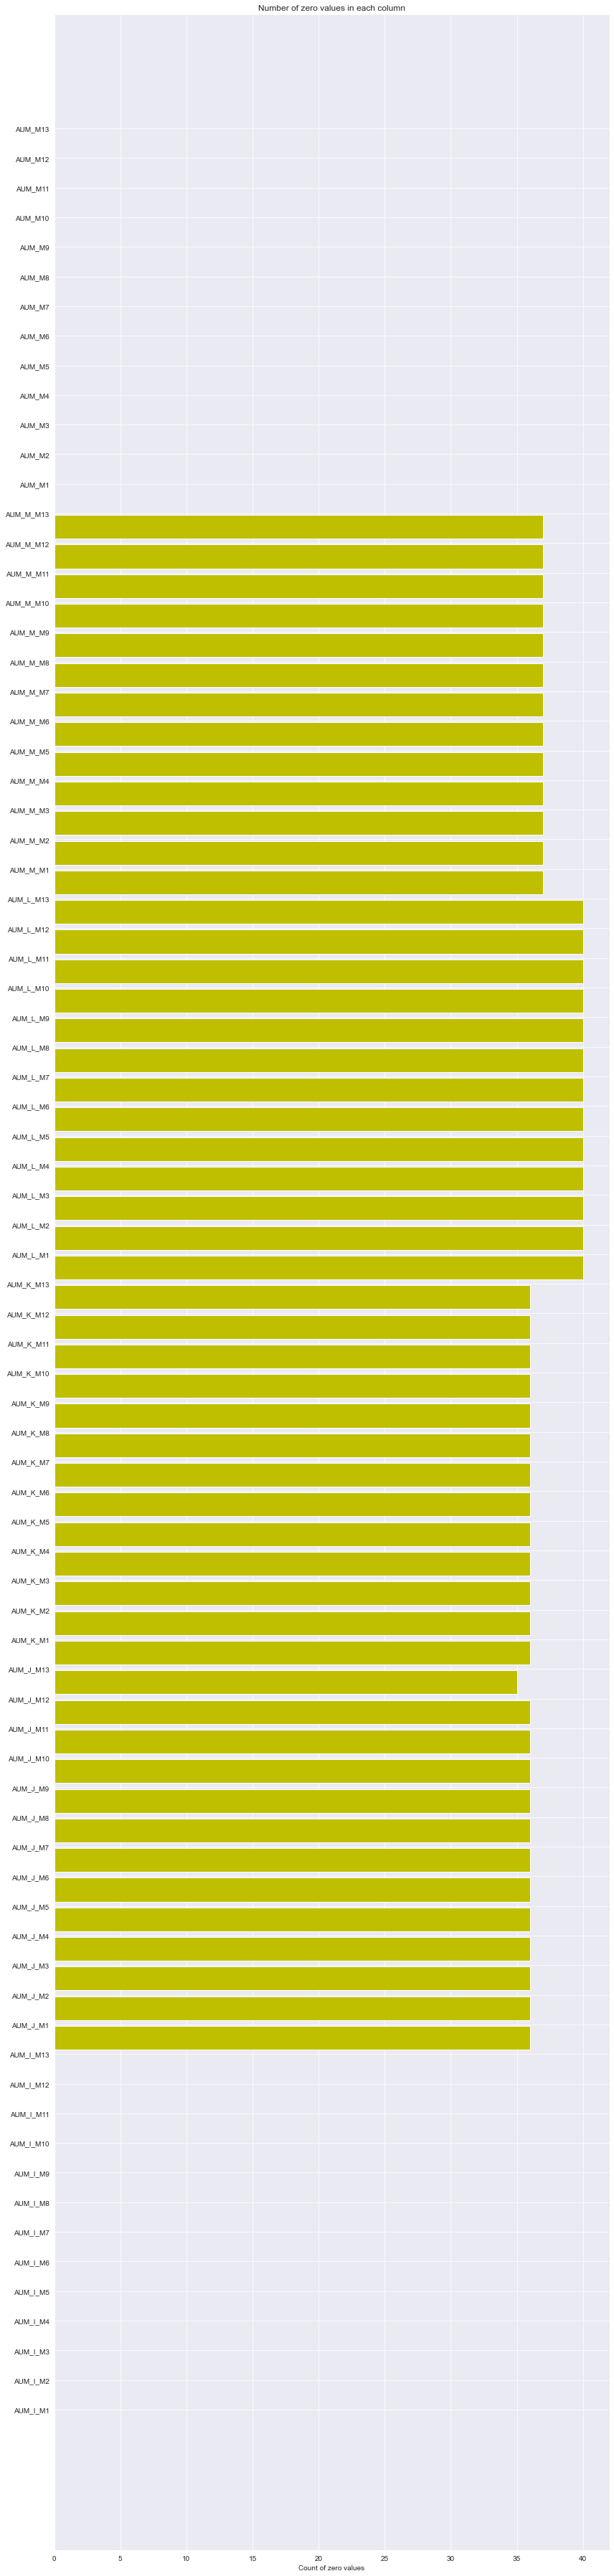

In [469]:
# 看有證券戶 (1~13都是1) 資產I~M的 0 有多少
tem = rich_low
tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem.loc[:,'AUM_I_M1':'AUM_M13']
labels = []
values = []
for col in tem.columns:
    labels.append(col)
    values.append((tem[col]==0).sum())
    print(col, values[-1])
ind = np.arange(len(labels))
width = 0.9

fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of zero values")
ax.set_title("Number of zero values in each column")
#autolabel(rects)
#plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

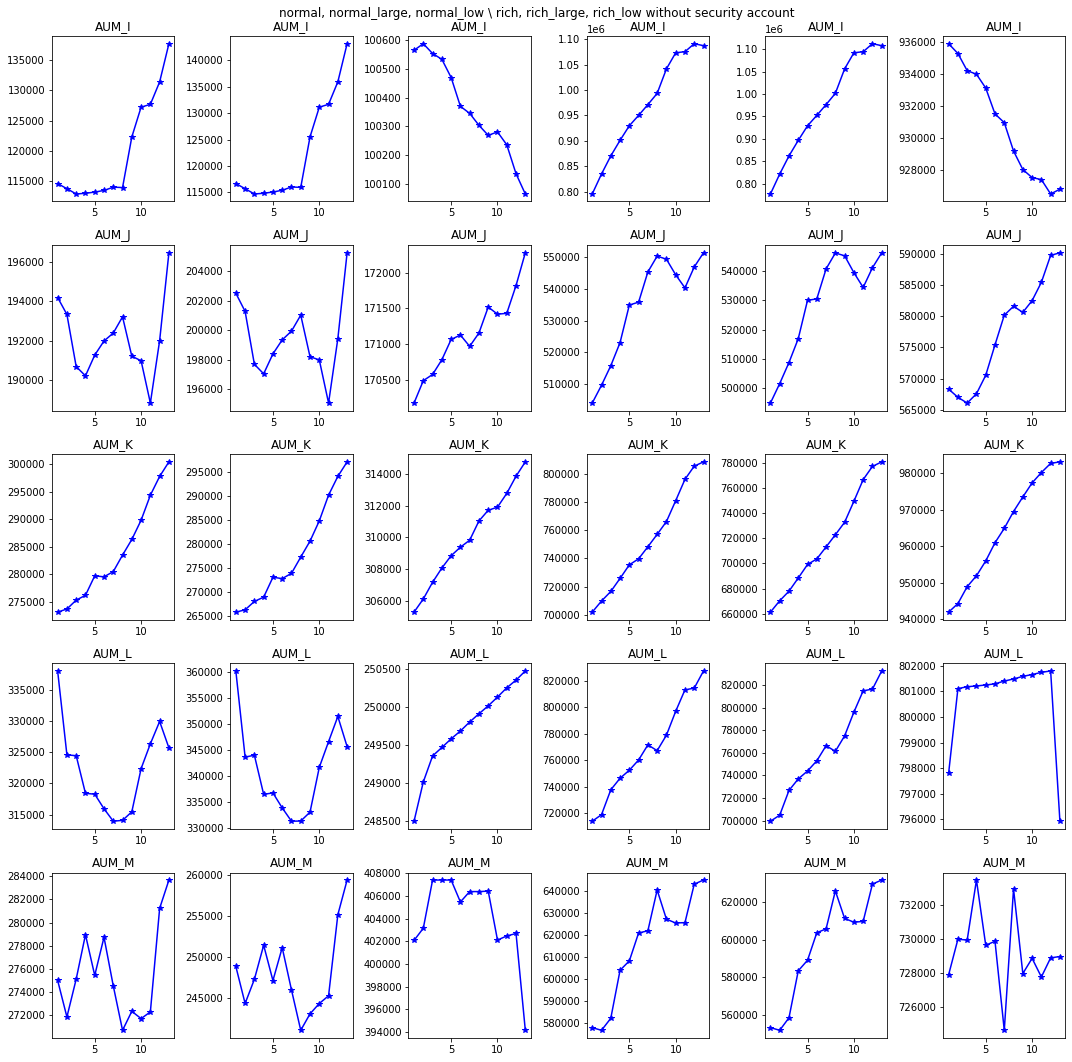

In [30]:
# 看沒有證券戶 (1~13都是)0 I~M trend
fig, axes = plt.subplots(5, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate( ['I','J','K','L','M']):
        tem = d
        tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())        
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'b')
        axes[(k,l)].set_title(f'AUM_{i}')
        
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low without security account')  
plt.tight_layout()

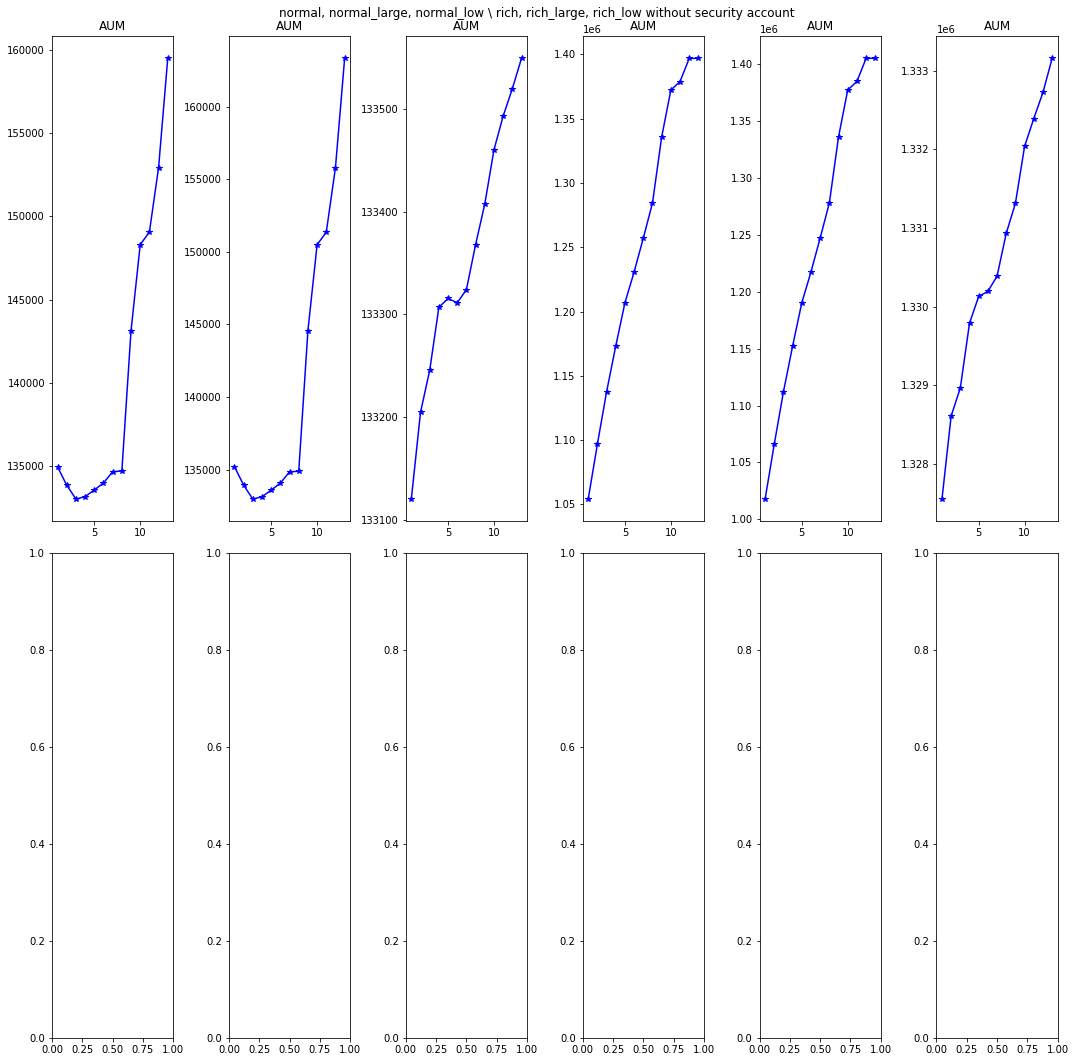

In [32]:
# 看沒有證券戶 (1~13都是0) AUM trend
fig, axes = plt.subplots(2, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
        tem = d
        tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_M{j}'] != 0][f'AUM_M{j}'].mean())        
        axes[(0,l)].plot(np.arange(1,14), data, marker = '*', color = 'b')
        axes[(0,l)].set_title(f'AUM')
        
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low without security account')  
plt.tight_layout()

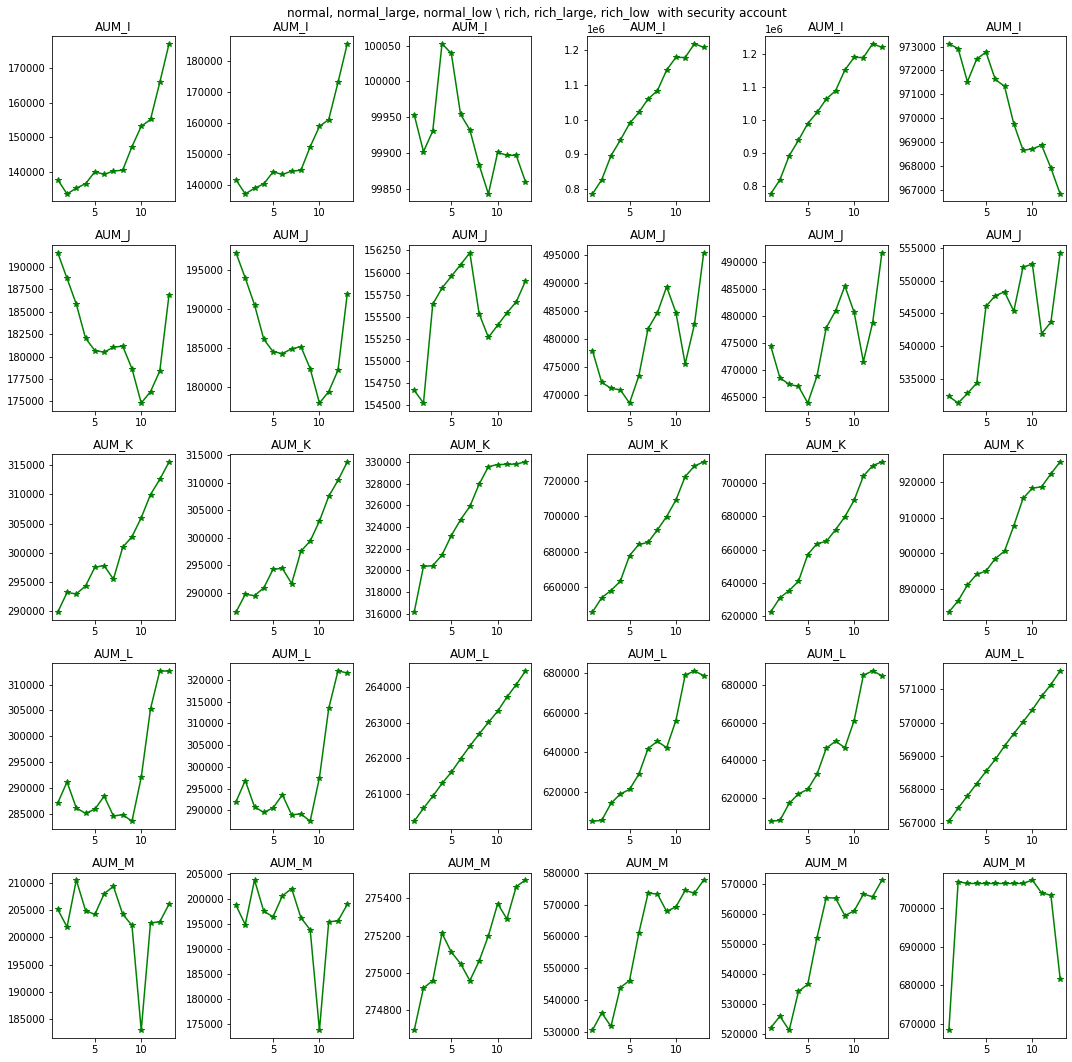

In [33]:
# 看有證券戶 (1~13都是1) I~M trend
fig, axes = plt.subplots(5, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate( ['I','J','K','L','M']):
        tem = d
        tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'g')
        axes[(k,l)].set_title(f'AUM_{i}')

        fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low  with security account')  
plt.tight_layout() 

#plt.savefig("exchange_trend.png")

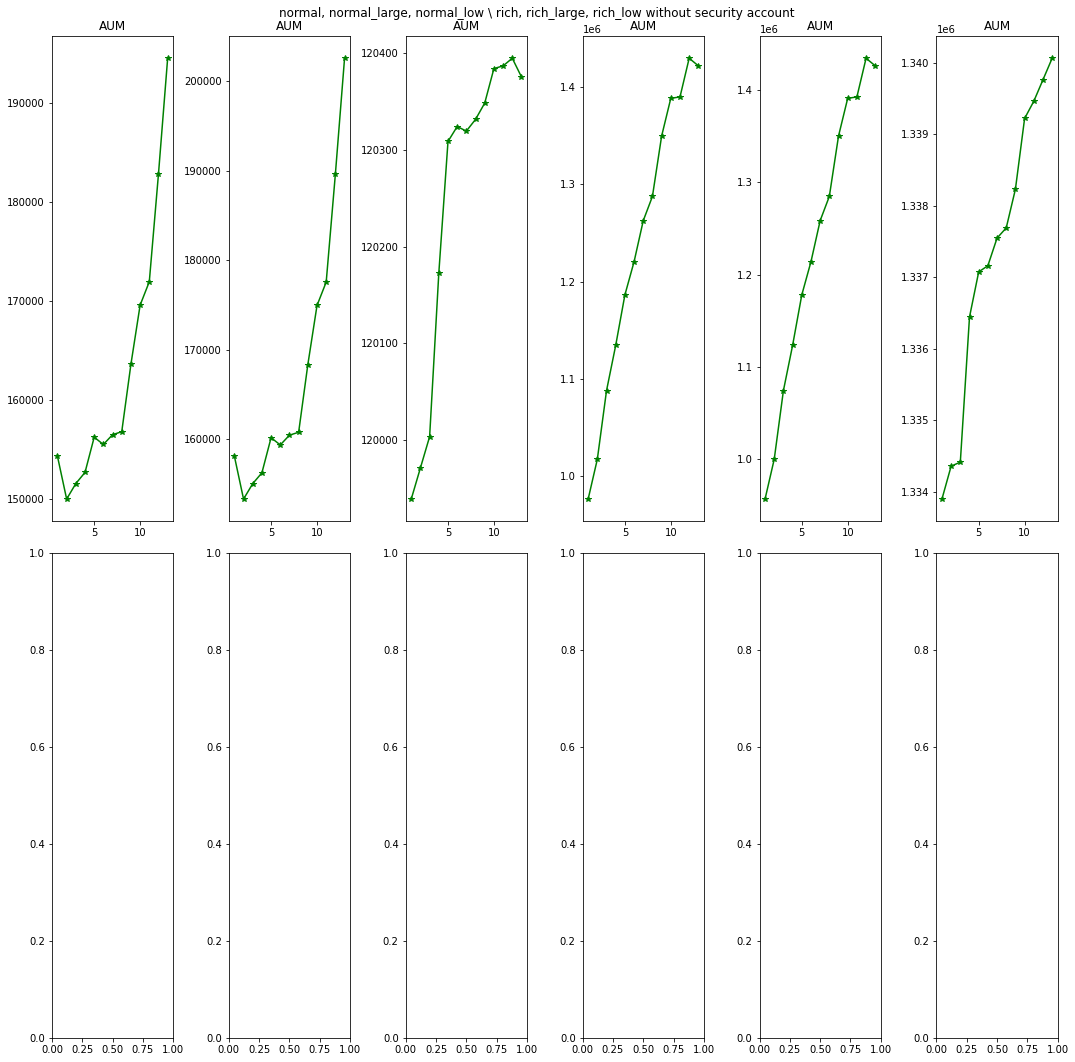

In [34]:
# 看有證券戶 (1~13都是1) AUM trend
fig, axes = plt.subplots(2, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
        tem = d
        tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_M{j}'] != 0][f'AUM_M{j}'].mean())        
        axes[(0,l)].plot(np.arange(1,14), data, marker = '*', color = 'g')
        axes[(0,l)].set_title(f'AUM')
        
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low without security account')  
plt.tight_layout()

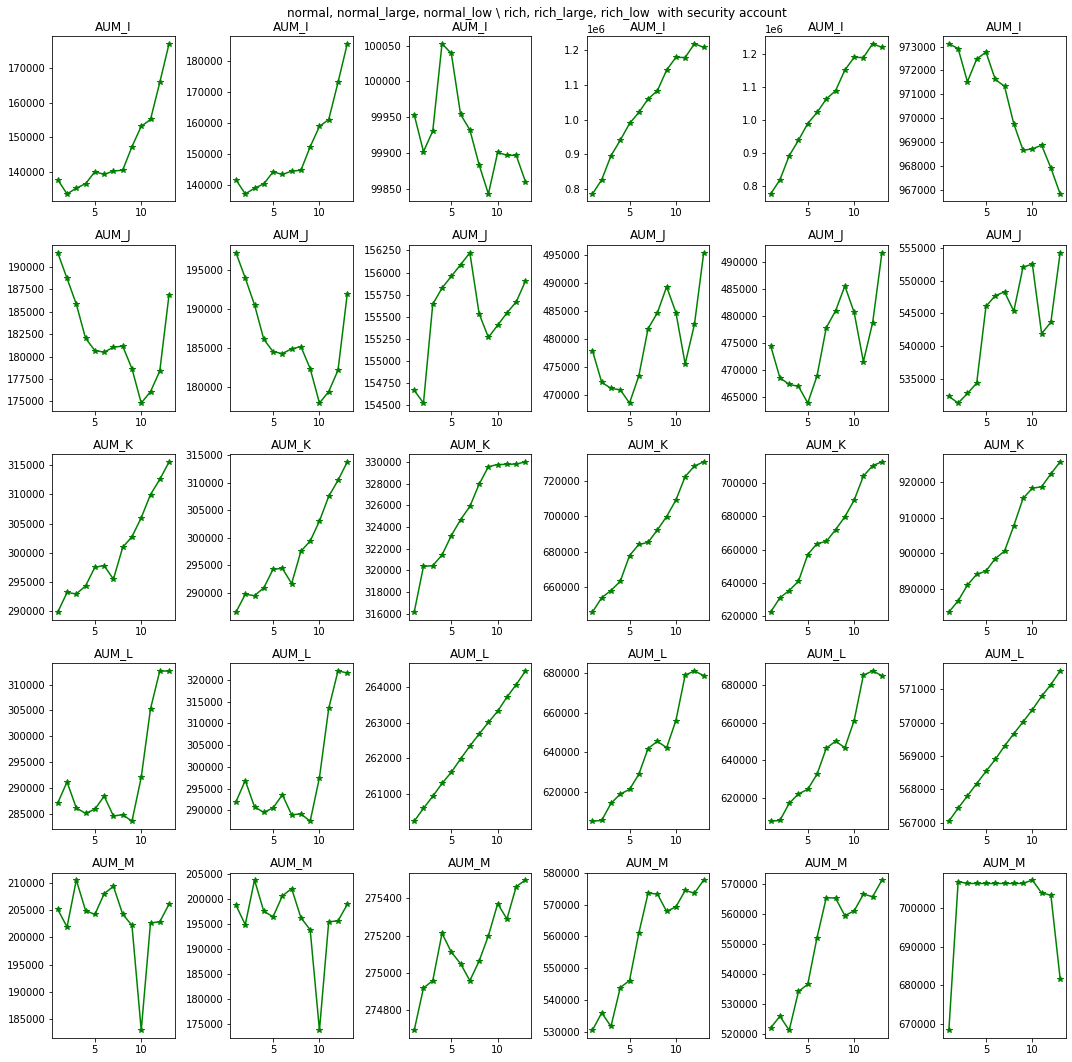

In [35]:
# 看有證券戶 (1~13都是1) I~M trend
fig, axes = plt.subplots(5, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate( ['I','J','K','L','M']):
        tem = d
        tem = tem[tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'g')
        axes[(k,l)].set_title(f'AUM_{i}')

        fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low  with security account')  
plt.tight_layout() 

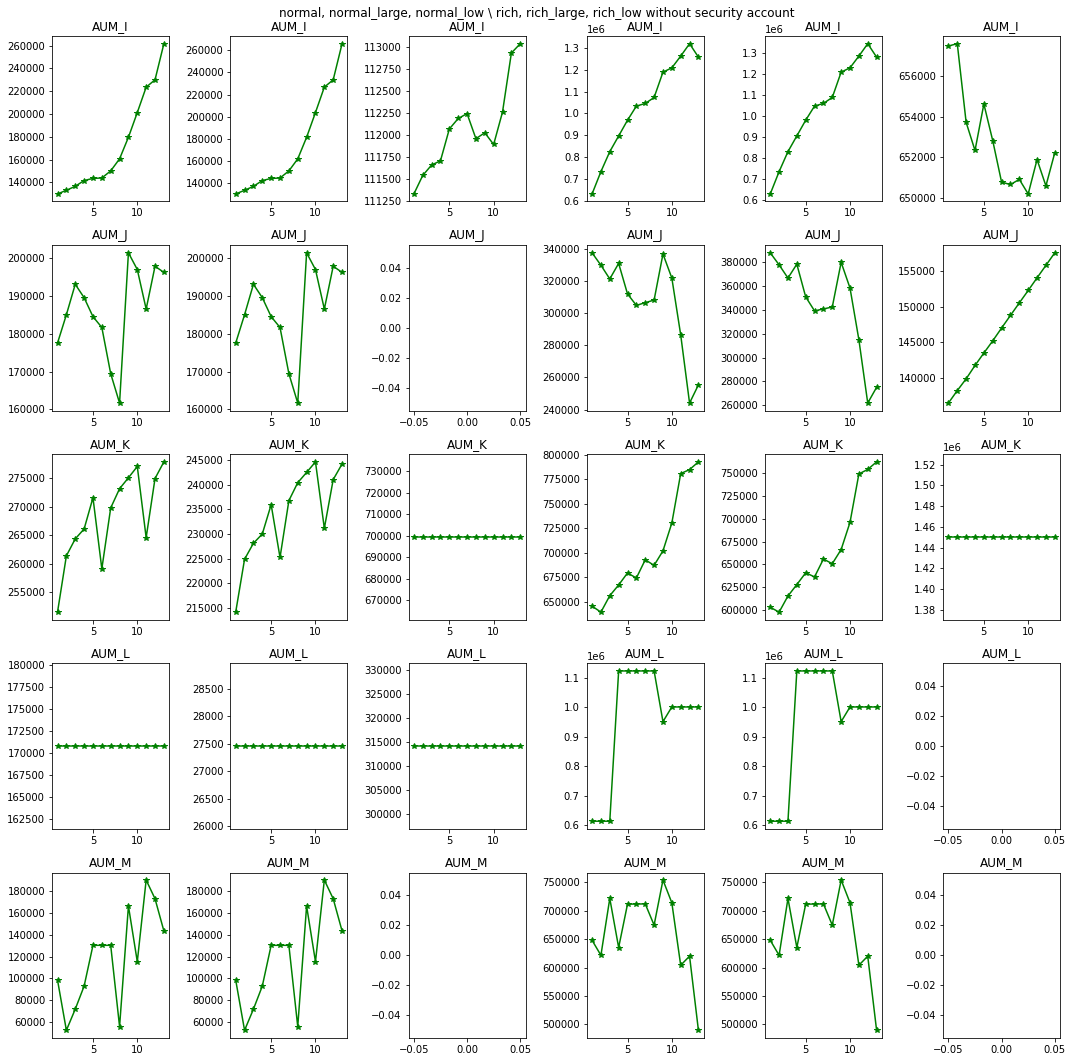

In [36]:
# 證券戶標籤1~13不全是0或是1 I~M trend
fig, axes = plt.subplots(5, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    for k,i in enumerate( ['I','J','K','L','M']):
        tem = d
        tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
        tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
        data = []
        
        for j in range(1,14):
            data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
        axes[(k,l)].plot(np.arange(1,14), data, marker = '*', color = 'g')
        axes[(k,l)].set_title(f'AUM_{i}')
        
        fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low without security account')  
plt.tight_layout()

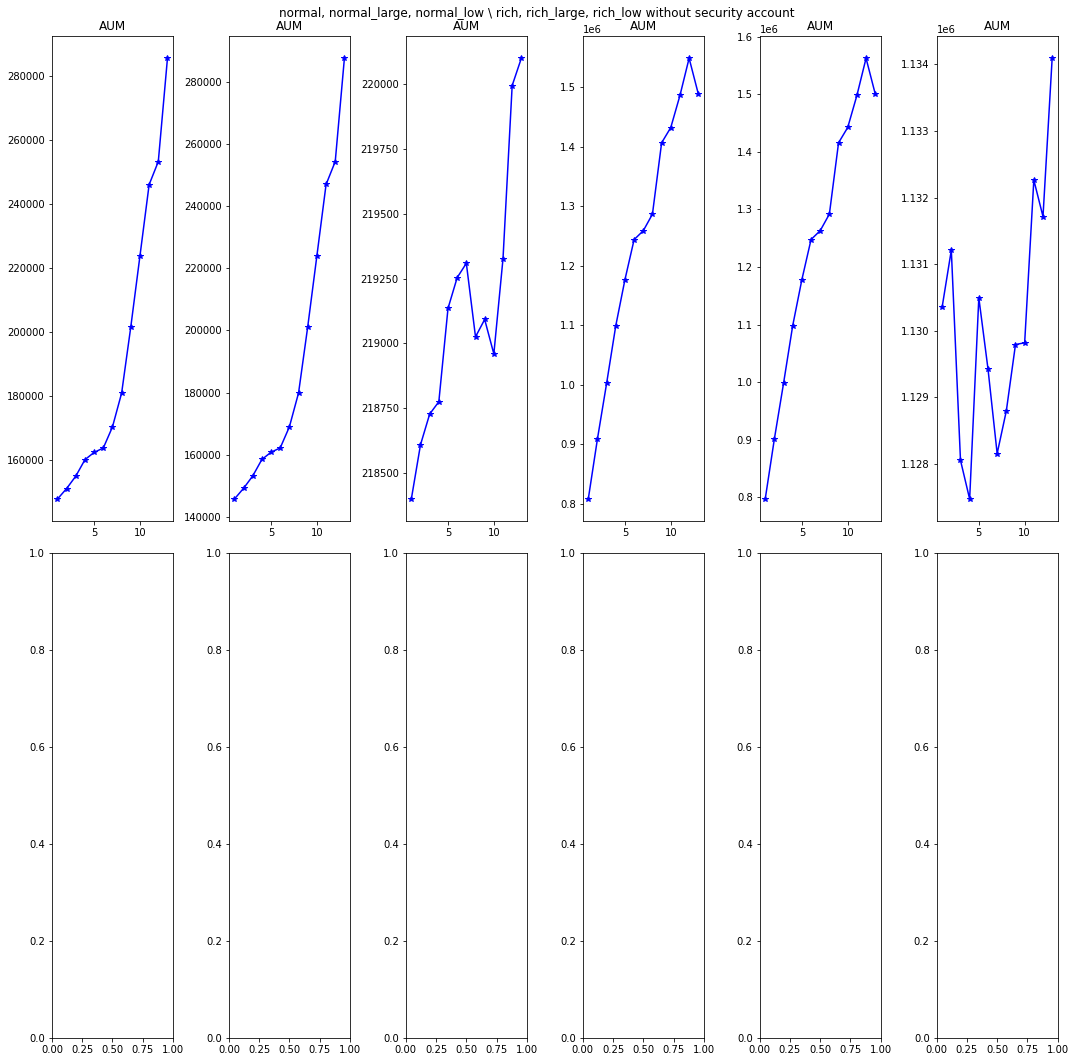

In [37]:
# 證券戶標籤1~13不全是0或是1 AUM tend
fig, axes = plt.subplots(2, 6,figsize=(15, 15))
for l,d in enumerate([normal, normal_large, normal_low, rich, rich_large, rich_low]):
    tem = d
    tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
    tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
    data = []
        
    for j in range(1,14):
        data.append( tem[tem[f'AUM_M{j}'] != 0][f'AUM_M{j}'].mean())        
    axes[(0,l)].plot(np.arange(1,14), data, marker = '*', color = 'b')
    axes[(0,l)].set_title(f'AUM')
        
fig.suptitle('normal, normal_large, normal_low \\ rich, rich_large, rich_low without security account')  
plt.tight_layout()

In [38]:
tem = df
tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].sum()

YN_SEC_ACC_M1     35941
YN_SEC_ACC_M2     35978
YN_SEC_ACC_M3     36028
YN_SEC_ACC_M4     36072
YN_SEC_ACC_M5     36104
YN_SEC_ACC_M6     36164
YN_SEC_ACC_M7     36215
YN_SEC_ACC_M8     36272
YN_SEC_ACC_M9     36326
YN_SEC_ACC_M10    36385
YN_SEC_ACC_M11    36490
YN_SEC_ACC_M12    36557
YN_SEC_ACC_M13    36617
dtype: int64

C:\Users\user\anaconda3\envs\quant\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


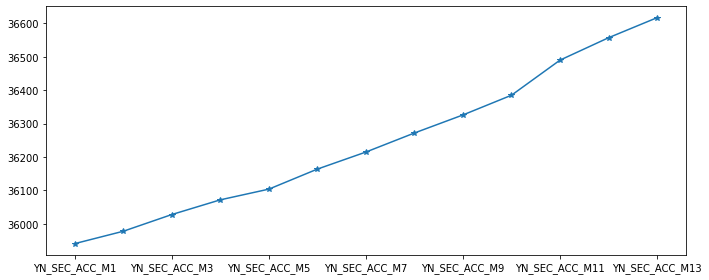

In [40]:
#　M1~M13 持有證券戶總數趨勢
tem = df
tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].sum().plot(figsize=(10,4), marker='*')
plt.tight_layout()
plt.show()

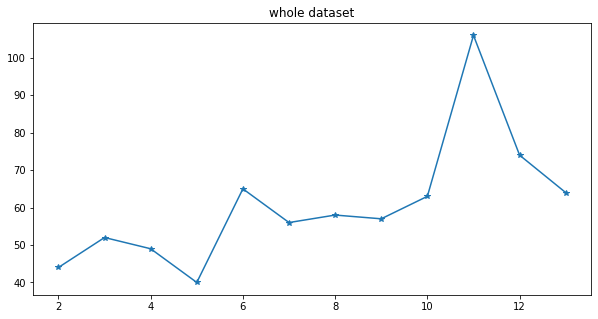

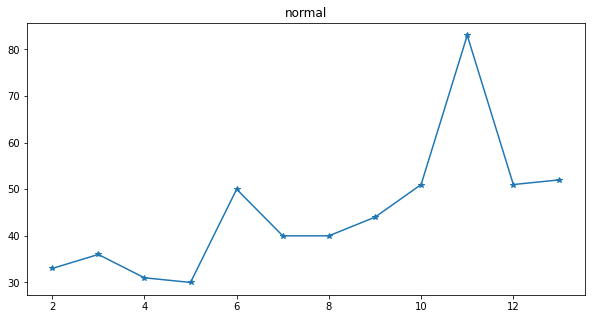

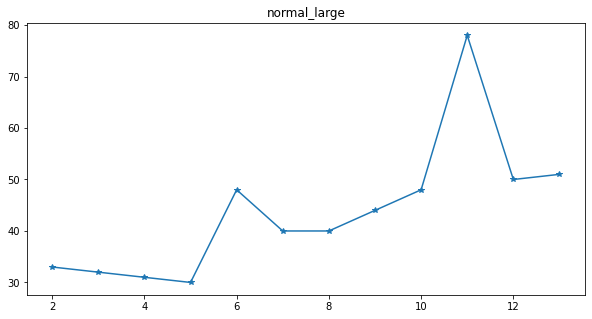

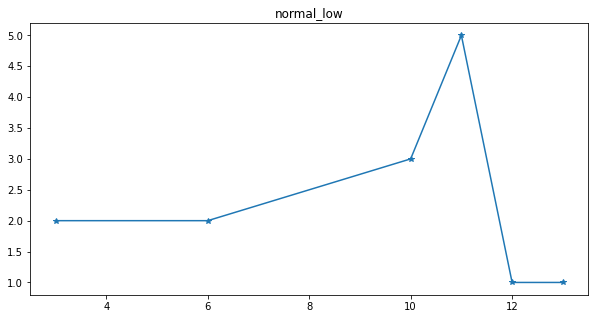

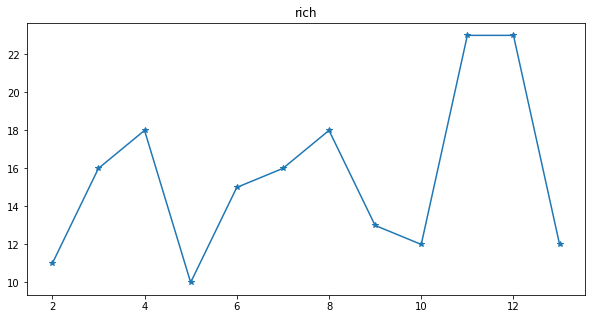

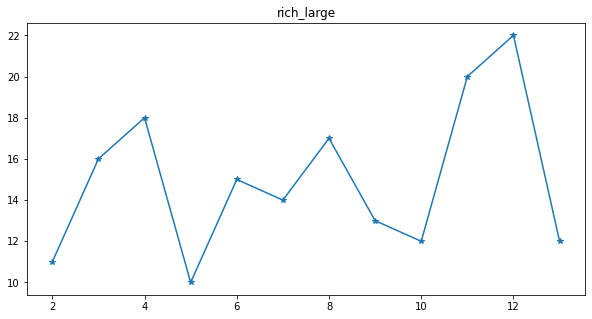

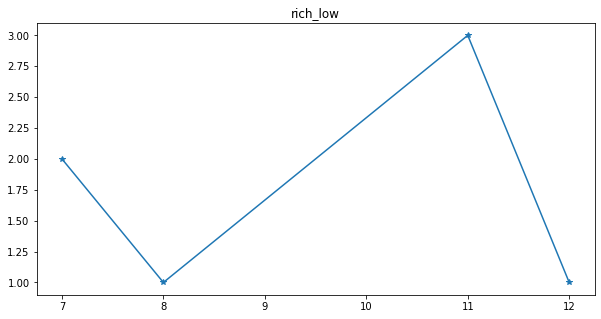

In [41]:
# 每月的開戶數 for 728 人
cols = ['whole dataset','normal', 'normal_large', 'normal_low', 'rich', 'rich_large', 'rich_low']
for l,k in enumerate([df, normal, normal_large, normal_low, rich, rich_large, rich_low]): 
    tem = k
    tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
    tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
    tem = tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']
    tem.columns = [i for i in range(1,14)]
    tem['first 1'] = tem.idxmax(axis=1)
    tem['first 0'] = tem.idxmin(axis=1)
    tem[tem['first 1']>tem['first 0']]['first 1'].value_counts().sort_index().plot(figsize=(10,5),title=cols[l],marker='*')
    plt.show()

In [45]:
# 觀察11月開戶的那群人 前處理
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']
tem.columns = [i for i in range(1,14)]
tem['first 1'] = tem.idxmax(axis=1)
tem['first 0'] = tem.idxmin(axis=1)
tem  = tem[tem['first 1']>tem['first 0']]
tem = tem[tem['first 1'] == 11]
#tem.shape
month_11 = tem.index.values
#['first 1'].value_counts().sort_index().plot(figsize=(10,5),title=cols[l],marker='*')

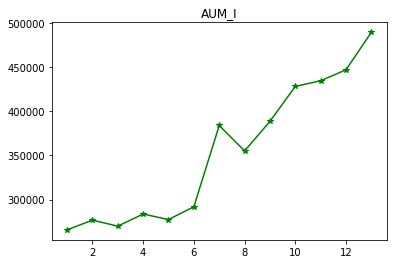

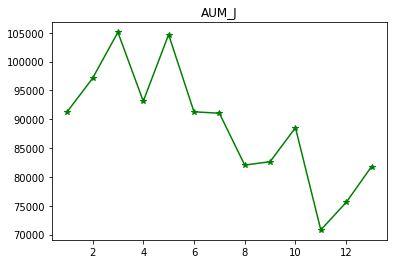

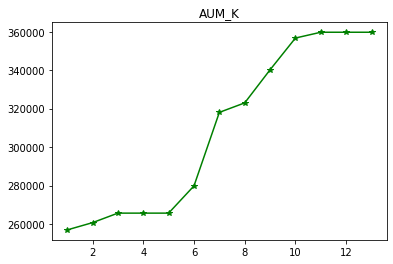

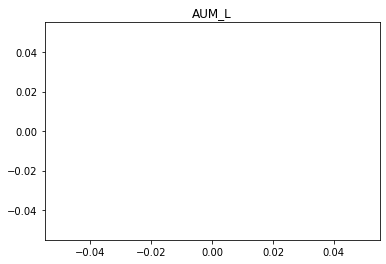

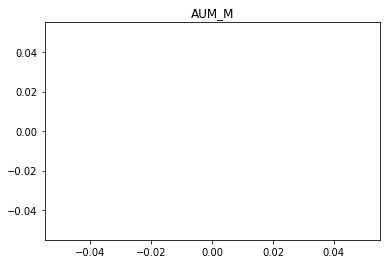

In [44]:
# 觀察6月開戶的那群人 I~M 資產變化
tem = df.loc[month_6,:]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

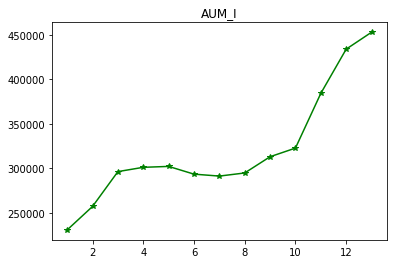

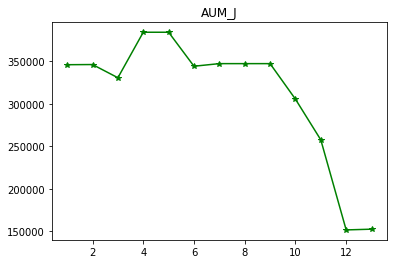

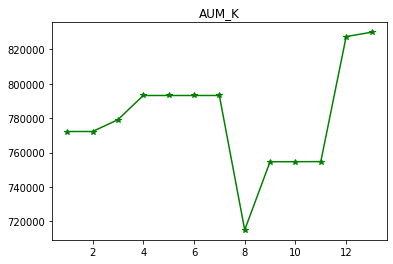

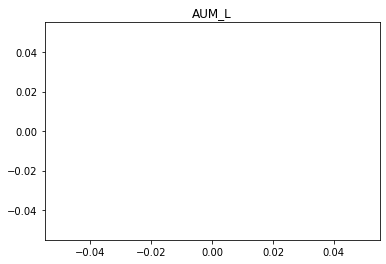

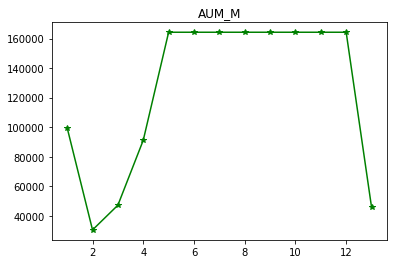

In [46]:
# 觀察11月開戶的那群人 I~M 資產變化
tem = df.loc[month_11,:]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

2     7
3     2
4     5
5     8
6     5
7     5
8     1
9     3
10    4
11    1
12    7
13    4
Name: first 0, dtype: int64


<AxesSubplot:>

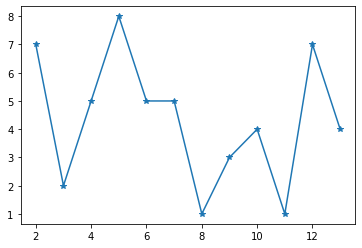

In [22]:
# 觀察 52 後來才比關閉帳戶的人，每月有幾個人關閉帳戶
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']
tem.columns = [i for i in range(1,14)]
tem['first 1'] = tem.idxmax(axis=1)
tem['first 0'] = tem.idxmin(axis=1)
tem  = tem[tem['first 1']<tem['first 0']]
print(tem['first 0'].value_counts().sort_index())
tem['first 0'].value_counts().sort_index().plot(marker='*')

In [51]:
# 觀察 在 ? 關閉帳戶人的  I~M 前處理
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']
tem.columns = [i for i in range(1,14)]
tem['first 1'] = tem.idxmax(axis=1)
tem['first 0'] = tem.idxmin(axis=1)
tem  = tem[tem['first 1']<tem['first 0']]
tem = tem[tem['first 0']==12]
month_12= tem.index.values

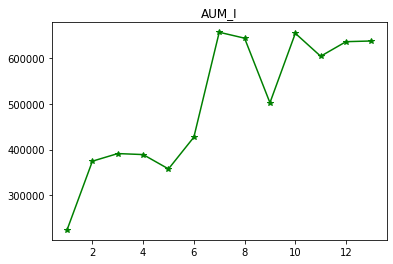

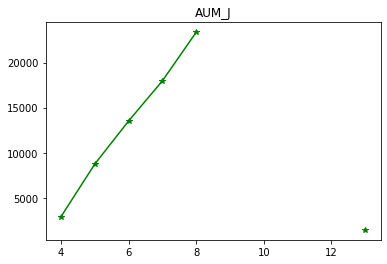

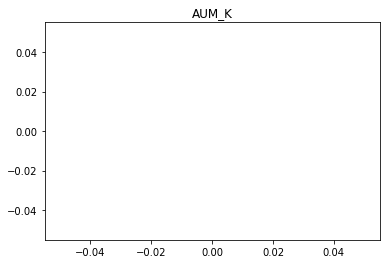

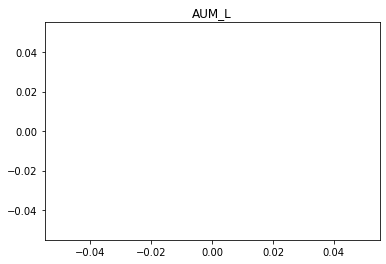

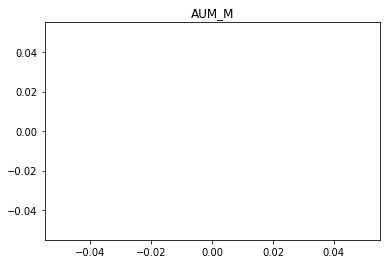

In [48]:
# 觀察 在 M2 關閉帳戶的人  I~M 
tem = df.loc[month_2,:]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

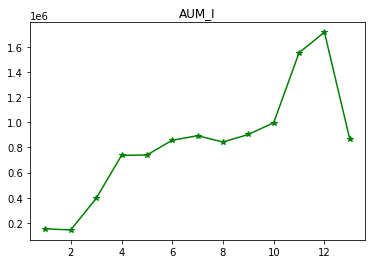

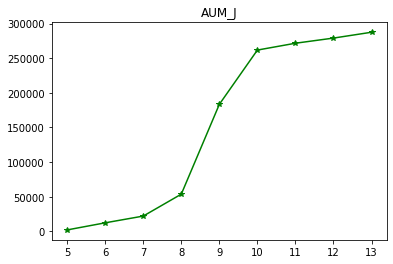

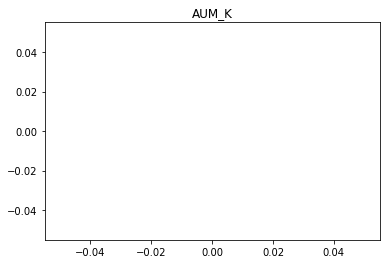

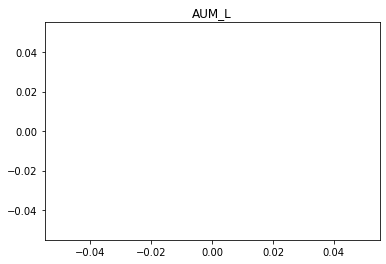

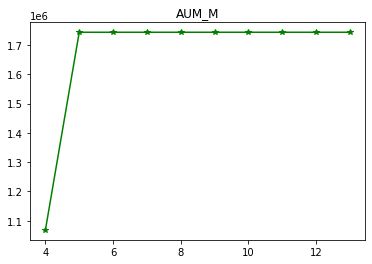

In [50]:
# 觀察 在 5 關閉帳戶的人  I~M
tem = df.loc[month_5,:]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

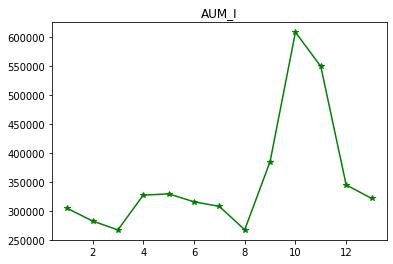

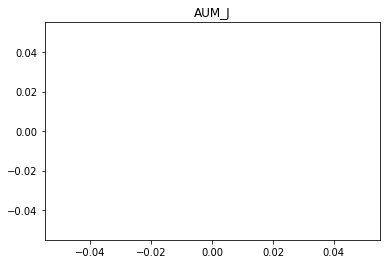

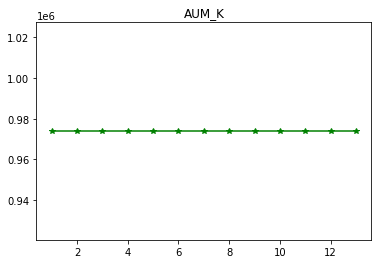

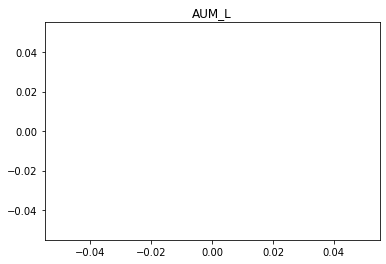

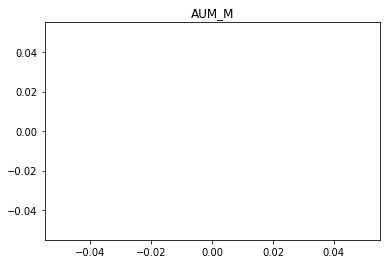

In [52]:
# 觀察 在 M12 關閉帳戶的人  I~M
tem = df.loc[month_12,:]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

### 看 M6 M11 新開戶年齡分布

In [65]:
# 觀察11月開戶的那群人 前處理
tem = df
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem = tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13']
tem.columns = [i for i in range(1,14)]
tem['first 1'] = tem.idxmax(axis=1)
tem['first 0'] = tem.idxmin(axis=1)
tem  = tem[tem['first 1']>tem['first 0']]
tem = tem[tem['first 1'] == 6]
#tem.shape
month_6 = tem.index.values
#['first 1'].value_counts().sort_index().plot(figsize=(10,5),title=cols[l],marker='*')

<AxesSubplot:>

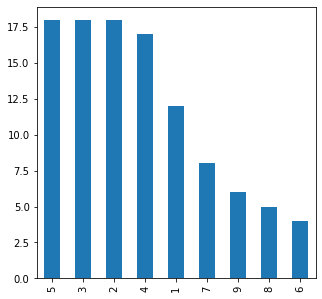

In [64]:
# M11 新開戶 年齡分布 
tem = df.loc[month_11,:]
tem['AGE'].value_counts().plot.bar(figsize=(5,5))

<AxesSubplot:>

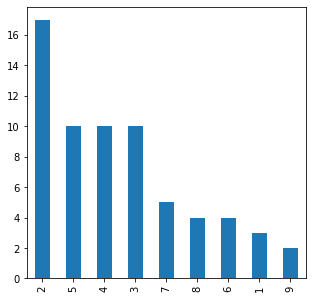

In [67]:
# M6 新開戶 年齡分布 
tem = df.loc[month_6,:]
tem['AGE'].value_counts().plot.bar(figsize=(5,5))

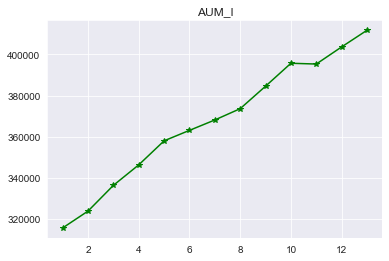

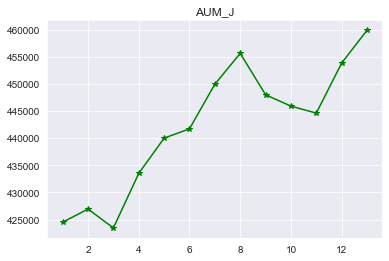

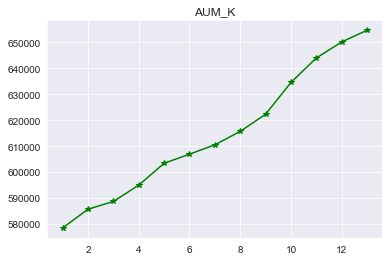

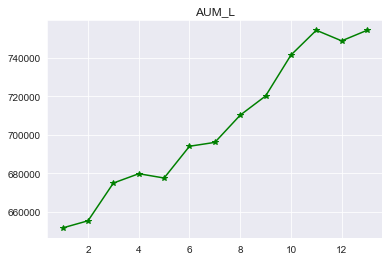

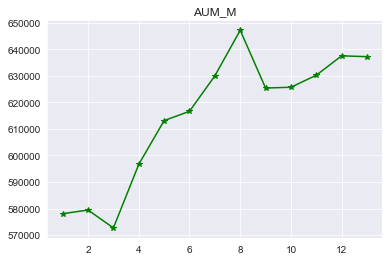

In [628]:
# 看老人 AGE=9 的AUM I~M變化
tem = df[df['AGE']==9]
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

## 申購理財商品金額

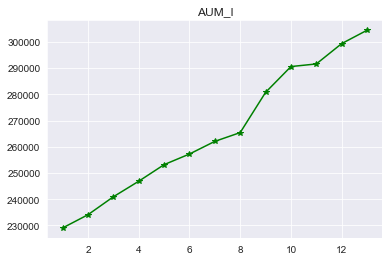

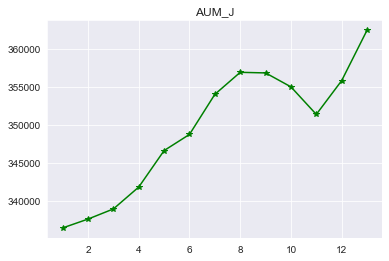

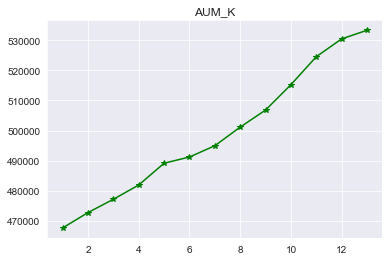

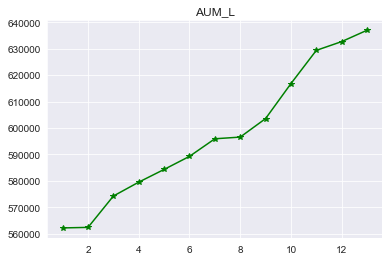

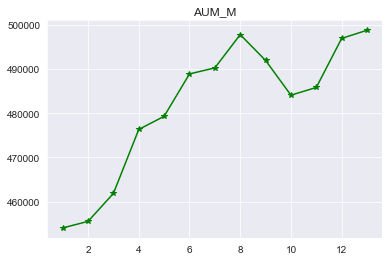

In [850]:
tem = df
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

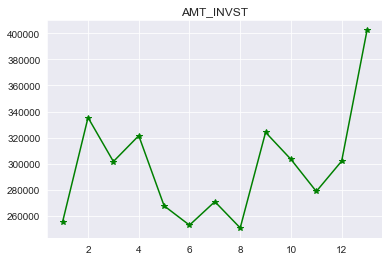

In [637]:
# 1~13 申購理財金額平均趨勢
tem = df.loc[:,'AMT_INVST_M1':'AMT_INVST_M13']
data=[]
for j in range(1,14):
    data.append( tem[tem[f'AMT_INVST_M{j}'] != 0][f'AMT_INVST_M{j}'].mean())       
plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
plt.title(f'AMT_INVST')
plt.show()

## 申購次數

In [639]:
df.shape

(200092, 330)

In [137]:
tem = df
tem = tem[~tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].eq(0).all(1)]
tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1).describe()

count    4727.000000
mean        3.601227
std         3.785938
min         2.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        73.000000
dtype: float64

<AxesSubplot:xlabel='SERIAL_NUM'>

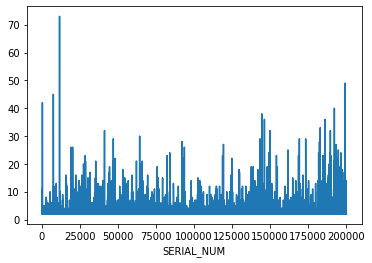

In [138]:
# 每個人總申購次數
tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1).plot()

C:\Users\user\anaconda3\envs\quant\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(3019, 330)

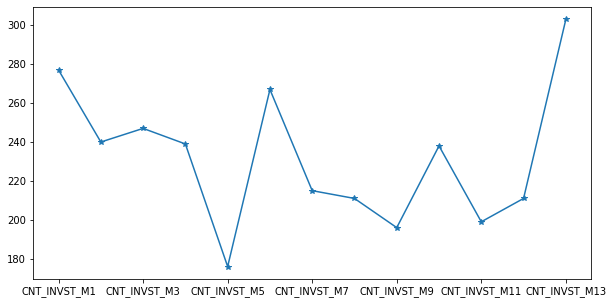

In [142]:
# 申購次數 = 2 的每月申購次數變化
tem2 = tem[tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1) == 2]
(tem2.loc[:,'CNT_INVST_M1':'CNT_INVST_M13']/2).sum().plot(figsize=(10,5),marker='*')
tem2.shape

C:\Users\user\anaconda3\envs\quant\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

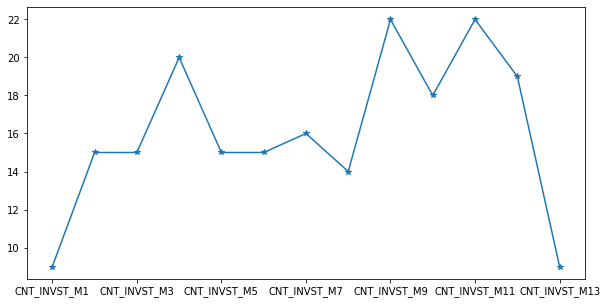

In [147]:
tem3 = tem[tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1) > 40]
(tem3.loc[:,'CNT_INVST_M1':'CNT_INVST_M13']).sum().plot(figsize=(10,5),marker='*')


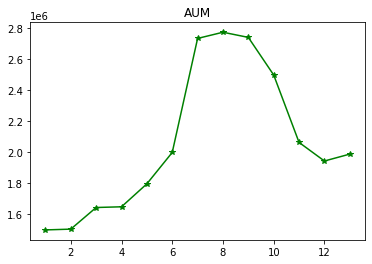

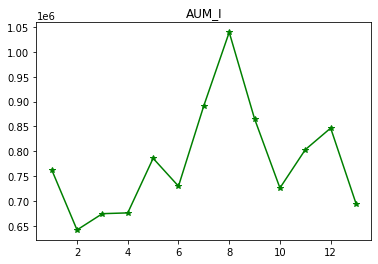

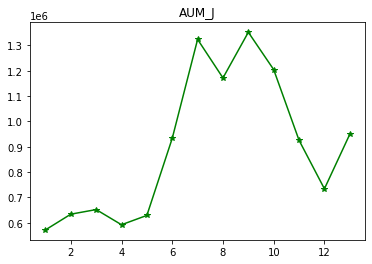

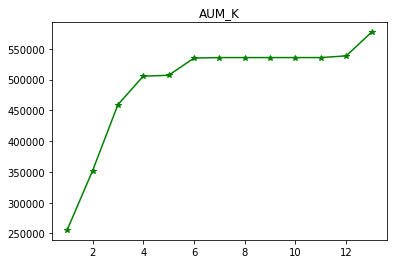

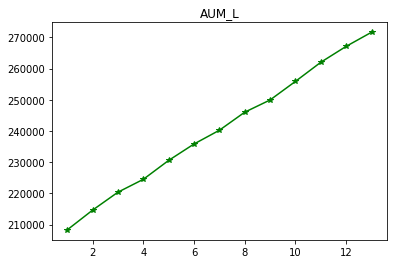

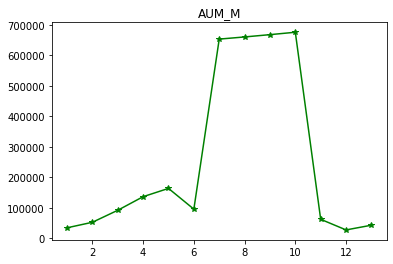

In [146]:
# 看申購次數 = ? 的資產變化
tem1 = tem[tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1) > 40 ]

data=[]
for j in range(1,14):
    data.append( tem1[tem1[f'AUM_M{j}'] != 0][f'AUM_M{j}'].mean())
plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
plt.title(f'AUM')
plt.show()
    
for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem1[tem1[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()


### 申購次數、金額 和職業、年齡、地區、距離、性別之關係

In [862]:
df.columns

Index(['CUST_LOCATION', 'AGE', 'GENDER', 'JOB', 'BRANCH_DIST',
       'AMT_EXCHANGE_A_M1', 'AMT_EXCHANGE_A_M2', 'AMT_EXCHANGE_A_M3',
       'AMT_EXCHANGE_A_M4', 'AMT_EXCHANGE_A_M5',
       ...
       'AUM_M4', 'AUM_M5', 'AUM_M6', 'AUM_M7', 'AUM_M8', 'AUM_M9', 'AUM_M10',
       'AUM_M11', 'AUM_M12', 'AUM_M13'],
      dtype='object', length=330)

In [148]:
cols = ['AGE','JOB','CUST_LOCATION','GENDER','BRANCH_DIST']

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'mean'}, xlabel='CUST_LOCATION'>

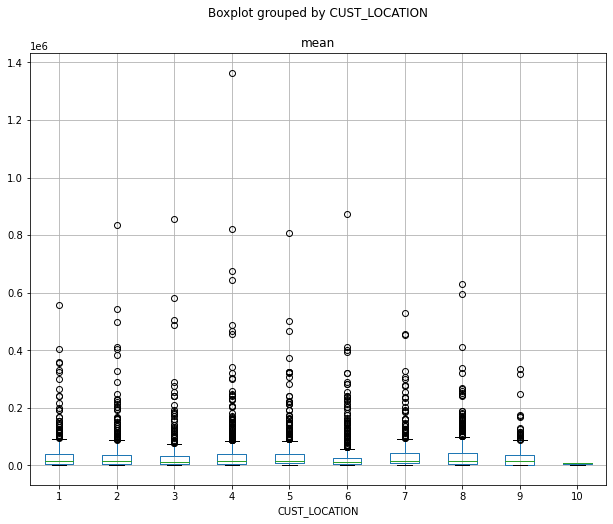

In [164]:
tem = df
tem = tem[~tem.loc[:,'AMT_INVST_M1':'AMT_INVST_M13'].eq(0).all(1)]
tem['mean'] = tem.loc[:,'AMT_INVST_M1':'AMT_INVST_M13'].mean(axis=1)
tem.boxplot(column = 'mean', by= 'CUST_LOCATION',figsize=(10,8))

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:title={'center':'times'}, xlabel='BRANCH_DIST'>

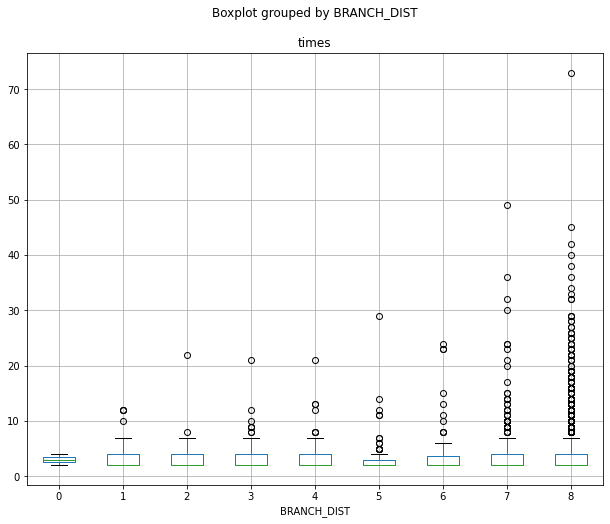

In [163]:
tem = df
tem = tem[~tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].eq(0).all(1)]
tem['times'] = tem.loc[:,'CNT_INVST_M1':'CNT_INVST_M13'].sum(axis=1)
tem.boxplot(column = 'times', by= 'BRANCH_DIST',figsize=(10,8))

In [880]:
tem[tem['BRANCH_DIST']==8].shape

(3766, 331)

In [884]:
tem[(tem['BRANCH_DIST']==8) & (tem['CUST_LOCATION']==9) & (tem['JOB']==9)]

,CUST_LOCATION,AGE,GENDER,JOB,BRANCH_DIST,AMT_EXCHANGE_A_M1,AMT_EXCHANGE_A_M2,AMT_EXCHANGE_A_M3,AMT_EXCHANGE_A_M4,AMT_EXCHANGE_A_M5,AMT_EXCHANGE_A_M6,AMT_EXCHANGE_A_M7,AMT_EXCHANGE_A_M8,AMT_EXCHANGE_A_M9,AMT_EXCHANGE_A_M10,AMT_EXCHANGE_A_M11,AMT_EXCHANGE_A_M12,AMT_EXCHANGE_A_M13,AMT_EXCHANGE_B_M1,AMT_EXCHANGE_B_M2,AMT_EXCHANGE_B_M3,AMT_EXCHANGE_B_M4,AMT_EXCHANGE_B_M5,AMT_EXCHANGE_B_M6,AMT_EXCHANGE_B_M7,AMT_EXCHANGE_B_M8,AMT_EXCHANGE_B_M9,AMT_EXCHANGE_B_M10,AMT_EXCHANGE_B_M11,AMT_EXCHANGE_B_M12,AMT_EXCHANGE_B_M13,AMT_EXCHANGE_C_M1,AMT_EXCHANGE_C_M2,AMT_EXCHANGE_C_M3,AMT_EXCHANGE_C_M4,AMT_EXCHANGE_C_M5,AMT_EXCHANGE_C_M6,AMT_EXCHANGE_C_M7,AMT_EXCHANGE_C_M8,AMT_EXCHANGE_C_M9,AMT_EXCHANGE_C_M10,AMT_EXCHANGE_C_M11,AMT_EXCHANGE_C_M12,AMT_EXCHANGE_C_M13,CNT_EXCHANGE_A_M1,CNT_EXCHANGE_A_M2,CNT_EXCHANGE_A_M3,CNT_EXCHANGE_A_M4,CNT_EXCHANGE_A_M5,CNT_EXCHANGE_A_M6,CNT_EXCHANGE_A_M7,CNT_EXCHANGE_A_M8,CNT_EXCHANGE_A_M9,CNT_EXCHANGE_A_M10,CNT_EXCHANGE_A_M11,CNT_EXCHANGE_A_M12,CNT_EXCHANGE_A_M13,CNT_EXCHANGE_B_M1,CNT_EXCHANGE_B_M2,CNT_EXCHANGE_B_M3,CNT_EXCHANGE_B_M4,CNT_EXCHANGE_B_M5,CNT_EXCHANGE_B_M6,CNT_EXCHANGE_B_M7,CNT_EXCHANGE_B_M8,CNT_EXCHANGE_B_M9,CNT_EXCHANGE_B_M10,CNT_EXCHANGE_B_M11,CNT_EXCHANGE_B_M12,CNT_EXCHANGE_B_M13,CNT_EXCHANGE_C_M1,CNT_EXCHANGE_C_M2,CNT_EXCHANGE_C_M3,CNT_EXCHANGE_C_M4,CNT_EXCHANGE_C_M5,CNT_EXCHANGE_C_M6,CNT_EXCHANGE_C_M7,CNT_EXCHANGE_C_M8,CNT_EXCHANGE_C_M9,CNT_EXCHANGE_C_M10,CNT_EXCHANGE_C_M11,CNT_EXCHANGE_C_M12,CNT_EXCHANGE_C_M13,AMT_INVST_M1,AMT_INVST_M2,AMT_INVST_M3,AMT_INVST_M4,AMT_INVST_M5,AMT_INVST_M6,AMT_INVST_M7,AMT_INVST_M8,AMT_INVST_M9,AMT_INVST_M10,AMT_INVST_M11,AMT_INVST_M12,AMT_INVST_M13,CNT_INVST_M1,CNT_INVST_M2,CNT_INVST_M3,CNT_INVST_M4,CNT_INVST_M5,CNT_INVST_M6,CNT_INVST_M7,CNT_INVST_M8,CNT_INVST_M9,CNT_INVST_M10,CNT_INVST_M11,CNT_INVST_M12,CNT_INVST_M13,AMT_LOAN_D_M1,AMT_LOAN_D_M2,AMT_LOAN_D_M3,AMT_LOAN_D_M4,AMT_LOAN_D_M5,AMT_LOAN_D_M6,AMT_LOAN_D_M7,AMT_LOAN_D_M8,AMT_LOAN_D_M9,AMT_LOAN_D_M10,AMT_LOAN_D_M11,AMT_LOAN_D_M12,AMT_LOAN_D_M13,AMT_LOAN_E_M1,AMT_LOAN_E_M2,AMT_LOAN_E_M3,AMT_LOAN_E_M4,AMT_LOAN_E_M5,AMT_LOAN_E_M6,AMT_LOAN_E_M7,AMT_LOAN_E_M8,AMT_LOAN_E_M9,AMT_LOAN_E_M10,AMT_LOAN_E_M11,AMT_LOAN_E_M12,AMT_LOAN_E_M13,AMT_LOAN_F_M1,AMT_LOAN_F_M2,AMT_LOAN_F_M3,AMT_LOAN_F_M4,AMT_LOAN_F_M5,AMT_LOAN_F_M6,AMT_LOAN_F_M7,AMT_LOAN_F_M8,AMT_LOAN_F_M9,AMT_LOAN_F_M10,AMT_LOAN_F_M11,AMT_LOAN_F_M12,AMT_LOAN_F_M13,FLG_WEB_M1,FLG_WEB_M2,FLG_WEB_M3,FLG_WEB_M4,FLG_WEB_M5,FLG_WEB_M6,FLG_WEB_M7,FLG_WEB_M8,FLG_WEB_M9,FLG_WEB_M10,FLG_WEB_M11,FLG_WEB_M12,FLG_WEB_M13,YN_WEB_ACTIVE_M1,YN_WEB_ACTIVE_M2,YN_WEB_ACTIVE_M3,YN_WEB_ACTIVE_M4,YN_WEB_ACTIVE_M5,YN_WEB_ACTIVE_M6,YN_WEB_ACTIVE_M7,YN_WEB_ACTIVE_M8,YN_WEB_ACTIVE_M9,YN_WEB_ACTIVE_M10,YN_WEB_ACTIVE_M11,YN_WEB_ACTIVE_M12,YN_WEB_ACTIVE_M13,YN_SEC_ACC_M1,YN_SEC_ACC_M2,YN_SEC_ACC_M3,YN_SEC_ACC_M4,YN_SEC_ACC_M5,YN_SEC_ACC_M6,YN_SEC_ACC_M7,YN_SEC_ACC_M8,YN_SEC_ACC_M9,YN_SEC_ACC_M10,YN_SEC_ACC_M11,YN_SEC_ACC_M12,YN_SEC_ACC_M13,CNT_WEB_LOGIN_M1,CNT_WEB_LOGIN_M2,CNT_WEB_LOGIN_M3,CNT_WEB_LOGIN_M4,CNT_WEB_LOGIN_M5,CNT_WEB_LOGIN_M6,CNT_WEB_LOGIN_M7,CNT_WEB_LOGIN_M8,CNT_WEB_LOGIN_M9,CNT_WEB_LOGIN_M10,CNT_WEB_LOGIN_M11,CNT_WEB_LOGIN_M12,CNT_WEB_LOGIN_M13,CNT_INTERACT_G_M1,CNT_INTERACT_G_M2,CNT_INTERACT_G_M3,CNT_INTERACT_G_M4,CNT_INTERACT_G_M5,CNT_INTERACT_G_M6,CNT_INTERACT_G_M7,CNT_INTERACT_G_M8,CNT_INTERACT_G_M9,CNT_INTERACT_G_M10,CNT_INTERACT_G_M11,CNT_INTERACT_G_M12,CNT_INTERACT_G_M13,CNT_INTERACT_H_M1,CNT_INTERACT_H_M2,CNT_INTERACT_H_M3,CNT_INTERACT_H_M4,CNT_INTERACT_H_M5,CNT_INTERACT_H_M6,CNT_INTERACT_H_M7,CNT_INTERACT_H_M8,CNT_INTERACT_H_M9,CNT_INTERACT_H_M10,CNT_INTERACT_H_M11,CNT_INTERACT_H_M12,CNT_INTERACT_H_M13,AMT_INTERACT_G_M1,AMT_INTERACT_G_M2,AMT_INTERACT_G_M3,AMT_INTERACT_G_M4,AMT_INTERACT_G_M5,AMT_INTERACT_G_M6,AMT_INTERACT_G_M7,AMT_INTERACT_G_M8,AMT_INTERACT_G_M9,AMT_INTERACT_G_M10,AMT_INTERACT_G_M11,AMT_INTERACT_G_M12,AMT_INTERACT_G_M13,AMT_INTERACT_H_M1,AMT_INTERACT_H_M2,AMT_INTERACT_H_M3,AMT_INTERACT_H_M4,AMT_INTERACT_H_M5,AMT_INTERACT_H_M6,AMT_INTERACT_H_M7,AMT

### 互動指標

In [942]:
tem=df
tem = tem[~tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].eq(0).all(1)]
#tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].sum(axis=1).describe()
tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].head()
#tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].max(axis=1).describe()

,CNT_WEB_LOGIN_M1,CNT_WEB_LOGIN_M2,CNT_WEB_LOGIN_M3,CNT_WEB_LOGIN_M4,CNT_WEB_LOGIN_M5,CNT_WEB_LOGIN_M6,CNT_WEB_LOGIN_M7,CNT_WEB_LOGIN_M8,CNT_WEB_LOGIN_M9,CNT_WEB_LOGIN_M10,CNT_WEB_LOGIN_M11,CNT_WEB_LOGIN_M12,CNT_WEB_LOGIN_M13
SERIAL_NUM,,,,,,,,,,,,,
2,0,0,3,3,0,2,3,0,3,7,3,0,0
4,5,6,6,4,3,8,5,2,4,5,6,6,6
7,4,3,10,4,8,9,5,13,11,8,8,10,7
10,0,0,0,0,0,0,2,0,0,0,0,0,0
12,0,0,0,0,2,3,3,0,0,2,0,2,0


In [84]:
# 用會員標籤=2 去看互動指標的敘述統計輛
tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)]
tem = tem[~tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].eq(0).all(1)]
tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].sum(axis=1).describe()

count    92772.000000
mean        64.712952
std         57.499147
min          2.000000
25%         22.000000
50%         50.000000
75%         92.000000
max        763.000000
dtype: float64

In [85]:
# 用會員標籤=1 去看互動指標的敘述統計輛
tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].eq(0).all(1)]
tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].sum(axis=1).describe()

count    7116.000000
mean       30.517144
std        37.457043
min         2.000000
25%         6.000000
50%        18.000000
75%        42.000000
max       802.000000
dtype: float64

In [86]:
# 用會員標籤=0 去看互動指標的敘述統計輛
tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].eq(0).all(1)]
tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].sum(axis=1).describe()

count    3.0
mean     2.0
std      0.0
min      2.0
25%      2.0
50%      2.0
75%      2.0
max      2.0
dtype: float64

###  活躍度標籤

In [77]:
# 用會員標籤=2 去看活躍度的敘述統計輛
tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)]
tem = tem[~tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].eq(0).all(1)]
tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].sum(axis=1).describe()

count    95389.000000
mean        11.884138
std          2.638426
min          1.000000
25%         13.000000
50%         13.000000
75%         13.000000
max         13.000000
dtype: float64

In [81]:
# 用會員標籤=1 去看活躍度的敘述統計輛

tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].eq(0).all(1)]
tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].sum(axis=1).describe()

count    7635.000000
mean        9.219777
std         4.040748
min         1.000000
25%         6.000000
50%        11.000000
75%        13.000000
max        13.000000
dtype: float64

In [83]:
# 用會員標籤=0 去看活躍度的敘述統計輛

tem=df
tem=tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].eq(0).all(1)]
tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].sum(axis=1).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [940]:
tem=df
tem = tem[~tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].eq(0).all(1)]
tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].max(axis=1).describe()

count    109664.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
dtype: float64

### 數位會員標籤

#### 由會員標籤去看 活躍度和互動

In [68]:
tem=df

In [914]:
tem=df
tem=tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)]
tem=tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)]
tem=tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)]
tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].head(20)

,FLG_WEB_M1,FLG_WEB_M2,FLG_WEB_M3,FLG_WEB_M4,FLG_WEB_M5,FLG_WEB_M6,FLG_WEB_M7,FLG_WEB_M8,FLG_WEB_M9,FLG_WEB_M10,FLG_WEB_M11,FLG_WEB_M12,FLG_WEB_M13
SERIAL_NUM,,,,,,,,,,,,,
15,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
18,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
94,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
119,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
154,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
186,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
361,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [69]:
tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)].shape

(64704, 330)

In [70]:
tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)].shape

(13227, 330)

In [71]:
tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)].shape

(115159, 330)

In [909]:
115159+64704+13227

193090

In [96]:
200092-193090

7002

In [95]:
# 年輕人數位通路市場人數
tem = df
tem = tem[(tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)) | (tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1))]
tem = tem[~tem.loc[:,'YN_WEB_ACTIVE_M1':'YN_WEB_ACTIVE_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'CNT_WEB_LOGIN_M1':'CNT_WEB_LOGIN_M13'].eq(0).all(1)]
tem.shape

(99888, 330)

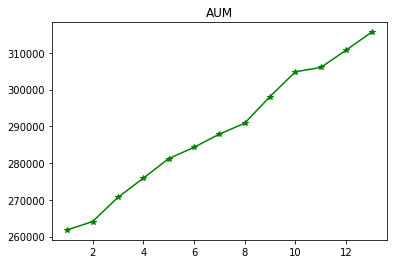

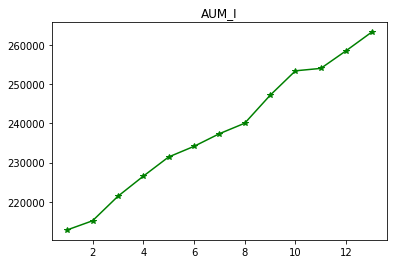

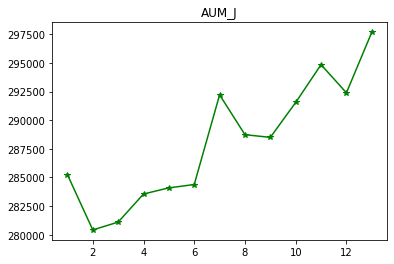

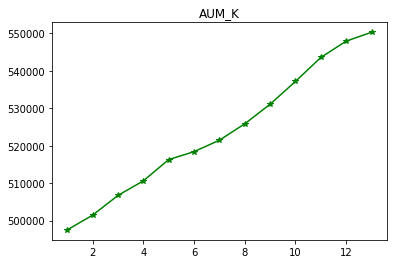

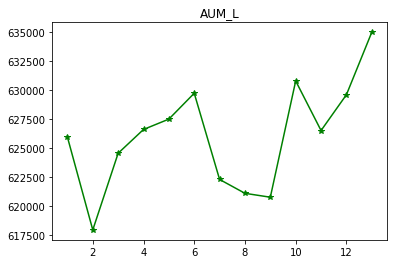

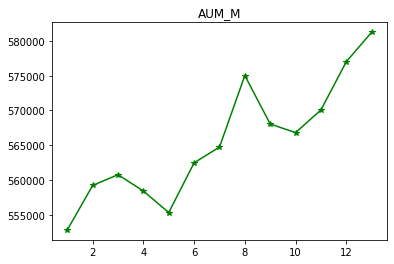

In [90]:
# 數位會員標籤是 0 的老人們 資產趨勢
tem = df
old = tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)].index.values

tem = df.loc[old,:]

data=[]
for j in range(1,14):
    data.append( tem[tem[f'AUM_M{j}'] != 0][f'AUM_M{j}'].mean())       
plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
plt.title(f'AUM')
plt.show()

for k,i in enumerate( ['I','J','K','L','M']):
    data=[]
    for j in range(1,14):
        data.append( tem[tem[f'AUM_{i}_M{j}'] != 0][f'AUM_{i}_M{j}'].mean())       
    plt.plot(np.arange(1,14), data, marker = '*', color = 'g' )
    plt.title(f'AUM_{i}')
    plt.show()

In [107]:
# 標籤不全都是是 0 或 1 或 2
tem = df
tem = tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)]
tem = tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)]
tem = tem[~tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)]
(tem['FLG_WEB_M13']==2).sum()  # 1~13 期間 有升級
#(tem['FLG_WEB_M13']==1).sum() 


6548

In [110]:
tem[tem.loc[:,'FLG_WEB_M12':'FLG_WEB_M13'].eq(2).all(1)].shape

(5981, 330)

### 標籤和類別變數關係

In [ ]:
cols = ['AGE','JOB','CUST_LOCATION','GENDER','BRANCH_DIST']

<AxesSubplot:>

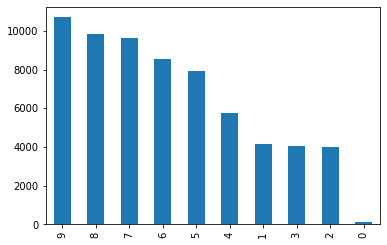

In [136]:
# 數位會員標籤 = 0 老人居多
tem = df
tem[tem.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(0).all(1)]['AGE'].value_counts().plot.bar()

In [ ]:
# 會員標籤占比

In [97]:
for i in [df, normal, normal_large, normal_low, rich, rich_large, rich_low]:
    a = i[i.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(2).all(1)].shape[0]
    b = i[i.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)].shape[0]
    print((a+b)/i.shape[0])

0.6416348479699339
0.6327538251707852
0.6672836205596457
0.39525652475935297
0.6879562610667578
0.7146655616561345
0.44863861386138615


In [944]:
for i in [df, normal, normal_large, normal_low, rich, rich_large, rich_low]:
    print(i[i.loc[:,'FLG_WEB_M1':'FLG_WEB_M13'].eq(1).all(1)].shape[0]/i.shape[0])

0.06610459188773164
0.07073811353118802
0.07097026282235841
0.07045747742383646
0.04193718741263086
0.04002210021064263
0.059096534653465344


## 轉換出新的dataset

In [774]:
normal.shape

(181350, 330)

In [775]:
rich.shape

(18742, 330)

In [828]:
tem1 = rich
percentile = round(tem1.shape[0] * 0.25)
index_to_normal = list(tem1.iloc[:,-13:].mean(axis=1).sort_values()[:percentile].index.values)

tem2 = normal
percentile = round(tem2.shape[0] * 0.9)
index_to_rich = list(tem2.iloc[:,-13:].mean(axis=1).sort_values()[percentile:].index.values)

normal1 = normal.drop(index_to_rich)
normal_index = list(normal1.index.values) + index_to_normal

rich1 = rich.drop(index_to_normal)
rich_index = list(rich1.index.values) + index_to_rich

In [829]:
normal_adj = df.loc[normal_index,:]
rich_adj = df.loc[rich_index,:]

In [831]:
rich_adj.shape

(32191, 330)

In [832]:
normal_adj.shape


(167901, 330)

In [834]:
def cv(x):
    try:
        value = x.std()/x.mean()
    except ZeroDivisionError:
        value = 0
        
    return value

rich_adj['cv'] = rich_adj.iloc[:,-13:].apply(cv,axis=1)
normal_adj['cv'] = normal_adj.iloc[:,-13:].apply(cv,axis=1)

C:\Users\user\anaconda3\envs\quant\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [836]:
rich_large_adj = rich_adj[rich_adj['cv']>0.01].iloc[:,:-1]
rich_low_adj = rich_adj[rich_adj['cv']<0.01].iloc[:,:-1]
normal_large_adj = normal_adj[normal_adj['cv']>0.01].iloc[:,:-1]
normal_low_adj = normal_adj[normal_adj['cv']<0.01].iloc[:,:-1]

In [838]:
normal_adj.to_csv('normal_adj.csv')
rich_adj.to_csv('rich_adj.csv')
rich_large_adj.to_csv('rich_large_adj.csv')
rich_low_adj.to_csv('rich_low_adj.csv')
normal_large_adj.to_csv('normal_large_adj.csv')
normal_low_adj.to_csv('normal_low_adj.csv')

In [849]:
rich_low.shape

(3232, 330)

## 換匯次數與資產關係

In [440]:
normal.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].shape

(181350, 13)

In [442]:
normal['YN_SEC_ACC_M1'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='SERIAL_NUM'>

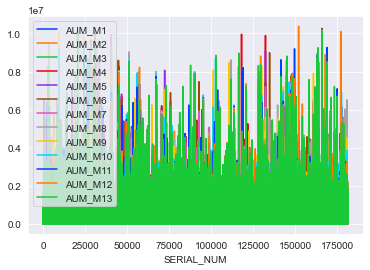

In [446]:
tem = normal
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]
tem.loc[:,'AUM_M1':'AUM_M13'].plot()

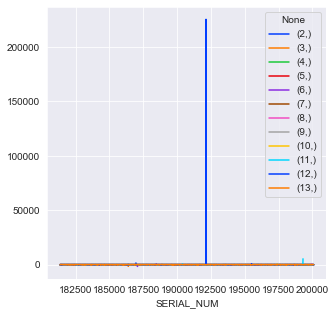

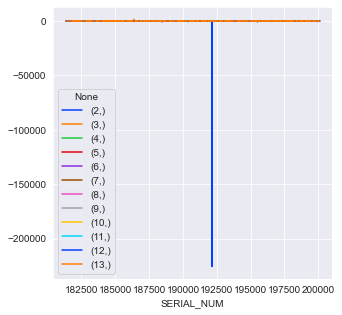

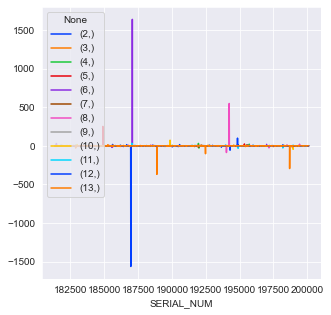

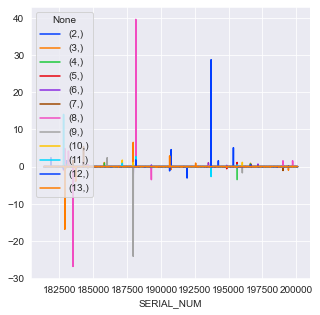

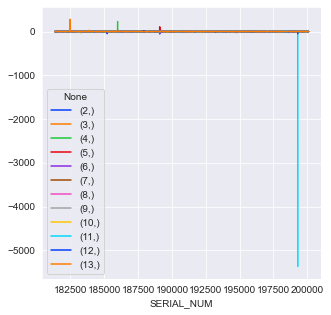

            I          J         K         L         M Con
2    1.327731  -0.052295 -0.271279  0.002188 -0.006345   I
3    0.768790   0.305010 -0.122136  0.001278  0.047058   I
4    0.848775   0.093344  0.014013  0.001447  0.042420   I
5    0.908249   0.006441  0.059619  0.002538  0.023154   I
6    0.836386  -0.145560  0.315719  0.000674 -0.007218   I
7    1.007080  -0.018758  0.007245  0.001475  0.002958   I
8    1.009413  -0.098439  0.086902  0.002688 -0.000564   I
9    0.964626   0.027007  0.009121 -0.004143  0.003389   I
10   1.121723  -0.140509  0.013616  0.000810  0.004360   I
11   1.975081  -0.016374  0.011025  0.002748 -0.972480   I
12  42.098661 -41.099476  0.010688  0.005274 -0.015147   I
13   0.946368   0.052699 -0.015964 -0.003011  0.019909   I


In [445]:
tem = rich
tem = tem[~tem.loc[:,'YN_SEC_ACC_M1':'YN_SEC_ACC_M13'].eq(0).all(1)]

I = tem.loc[:,"AUM_I_M1":"AUM_I_M13"].diff(axis=1).drop('AUM_I_M1',axis=1)
I.columns = [np.arange(2,14)]

J = tem.loc[:,"AUM_J_M1":"AUM_J_M13"].diff(axis=1).drop('AUM_J_M1',axis=1)
J.columns = [np.arange(2,14)]

K = tem.loc[:,"AUM_K_M1":"AUM_K_M13"].diff(axis=1).drop('AUM_K_M1',axis=1)
K.columns = [np.arange(2,14)]

L = tem.loc[:,"AUM_L_M1":"AUM_L_M13"].diff(axis=1).drop('AUM_L_M1',axis=1)
L.columns = [np.arange(2,14)]

M = tem.loc[:,"AUM_M_M1":"AUM_M_M13"].diff(axis=1).drop('AUM_M_M1',axis=1)
M.columns = [np.arange(2,14)]

AUM =  tem.loc[:,"AUM_M1":"AUM_M13"].diff(axis=1).drop('AUM_M1',axis=1)
AUM.columns = [np.arange(2,14)]
I = (I / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
J = (J / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
K = (K / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
L = (L / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)
M = (M / AUM).replace(-np.inf,np.nan).replace(np.inf,np.nan)



for d in  [I,J,K,L,M]:
    d.plot(figsize=(5,5),title = '')
    plt.show()


tem = pd.concat([I.mean(),J.mean(),K.mean(),L.mean(),M.mean()],axis=1)
tem.columns = ['I','J','K','L','M']
tem['Con']  =tem.abs().idxmax(axis=1)


print(tem)
print('============================================================')
print('============================================================')

In [248]:
pd.DataFrame({'a':[1,2,3],'b':[4,5,6]}) / pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

,a,b
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


In [224]:
pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

,a,b
0,1,4
1,2,5
2,3,6


In [226]:
pd.DataFrame({'a':[1,2,3],'b':[4,5,6]}).diff(axis=1)

,a,b
0,NaN,3.0
1,NaN,3.0
2,NaN,3.0


## 換匯金額與資產關係

In [ ]:
tem = rich[~rich.loc[:,"AMT_EXCHANGE_A_M1":f"AMT_EXCHANGE_A_M13"].eq(0).all(1)]
tem = tem[~tem.loc[:,'AUM_M1':"AUM_M13"].eq(0).all(1)]
A = tem[~tem.loc[:,"AUM_I_M1":f"AUM_I_M13"].eq(0).all(1)].loc[:,"AUM_I_M1":f"AUM_I_M13"]
B = tem[~tem.loc[:,"AUM_I_M1":f"AUM_I_M13"].eq(0).all(1)].loc[:,"AMT_EXCHANGE_A_M1":f"AMT_EXCHANGE_A_M13"]

pd.concat([A,B], axis=1)

In [168]:
for i in ['A',"B",'C']:    
    
    # for "AMT_EXCHANGE_X_M11":"AMT_EXCHANGE_X_M13" not equal to 0
    tem = rich[~rich.loc[:,f"AMT_EXCHANGE_{i}_M1":f"AMT_EXCHANGE_{i}_M13"].eq(0).all(1)]
    
    print(f'AMT_EXCHANGE_{i} not equla zero = ', tem.shape[0])
    
    # for 'AUM_M1':"AUM_M13" not equal to 0
    tem = tem[~tem.loc[:,'AUM_M1':"AUM_M13"].eq(0).all(1)]
    
    print('=======================================')
    for j in ['I','J','K','L','M']:
        print('----------------------------------------')
        print(f'AUM_{j} not equal to zero = ',tem[~tem.loc[:,f"AUM_{j}_M1":f"AUM_{j}_M13"].eq(0).all(1)].shape[0])
        print('----------------------------------------')
    
    

AMT_EXCHANGE_A not equla zero =  1772
----------------------------------------
AUM_I not equal to zero =  1772
----------------------------------------
----------------------------------------
AUM_J not equal to zero =  203
----------------------------------------
----------------------------------------
AUM_K not equal to zero =  433
----------------------------------------
----------------------------------------
AUM_L not equal to zero =  69
----------------------------------------
----------------------------------------
AUM_M not equal to zero =  98
----------------------------------------
AMT_EXCHANGE_B not equla zero =  2439
----------------------------------------
AUM_I not equal to zero =  2439
----------------------------------------
----------------------------------------
AUM_J not equal to zero =  476
----------------------------------------
----------------------------------------
AUM_K not equal to zero =  493
----------------------------------------
--------------------

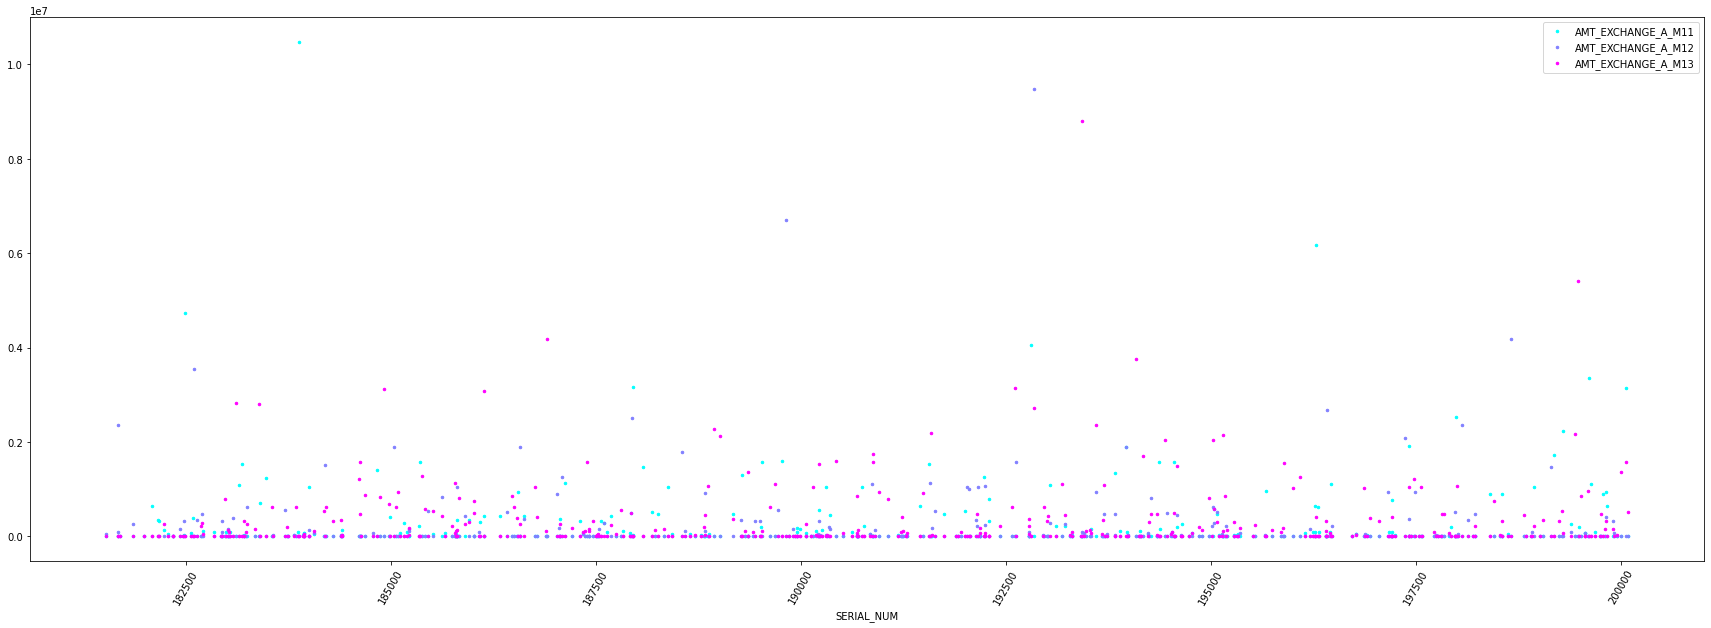

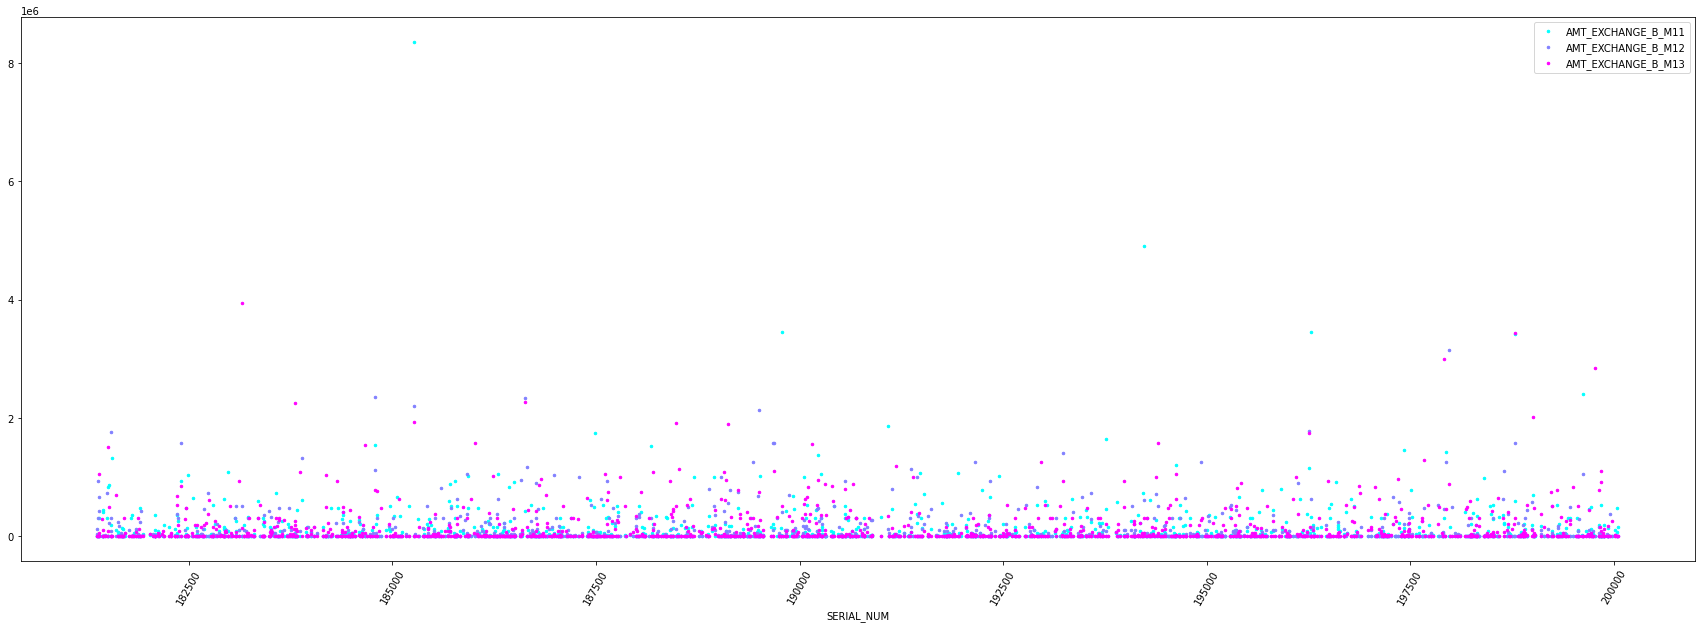

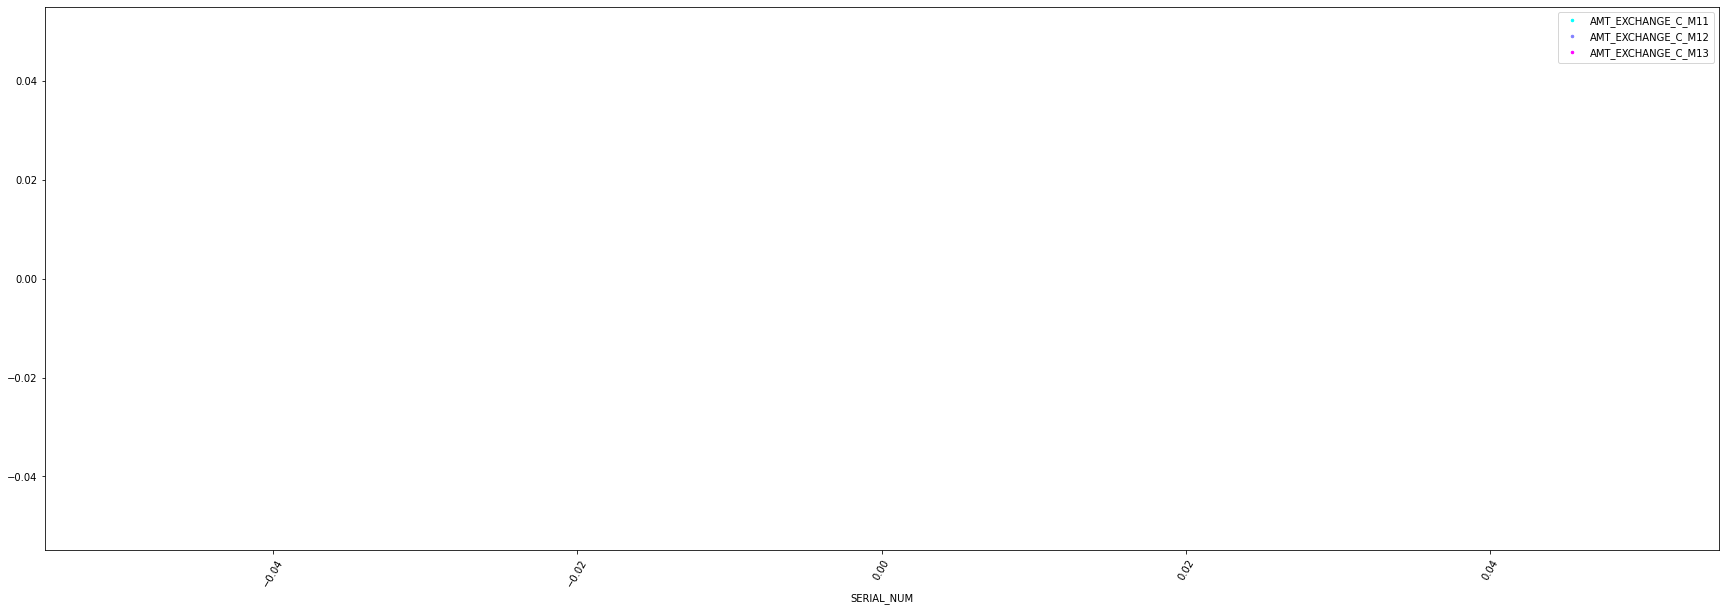

In [131]:
for i in ['A',"B",'C']:
    rich[~rich.loc[:,f"AMT_EXCHANGE_{i}_M11":f"AMT_EXCHANGE_{i}_M13"].eq(0).all(1)].loc[:,f"AMT_EXCHANGE_{i}_M11":f"AMT_EXCHANGE_{i}_M13"].plot(style='.',figsize=(30,10),markersize=5,rot=60,colormap='cool')

In [127]:
for i in ['A',"B",'C']:
    print(rich[~rich.loc[:,f"CNT_EXCHANGE_{i}_M11":f"CNT_EXCHANGE_{i}_M13"].eq(0).all(1)].loc[:,f"CNT_EXCHANGE_{i}_M11":f"CNT_EXCHANGE_{i}_M13"].shape[0])

451
1315
0
